<a href="https://colab.research.google.com/github/ch-manasa/AI-and-ML/blob/main/Personal_Loan_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Machine Learning: Personal Loan Campaign - Solution Notebook**




# Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data Scientist at AllLife Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.

# Key Questions to be Answered



* Which customer features are most predictive of personal loan uptake?

* Can we create a robust predictive model to rank customers by purchase probability?

* Which customer segments should marketing target to maximize conversions and ROI?

* Customer behaviour vs profile:
1.   Which customer attributes differ most from those who have taken personal loan vs who has not.
2.   Any demographic patterns among customers who have taken personal loan.
3. How financial factors impact whether customers take loan or not.

* Overall key personal loan acceptance rate across all segments.

# Data Description
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: # years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: The family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have a securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use Internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Background and content**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI&ML/ML/Loan_Modelling.csv')
# Data Overview
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
df.shape

(5000, 14)

In [ ]:
# Need to check the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations:


*   The dataset contains 5000 records
* All the columns present are numerical columns, with CCAvg being a float datatype and rest of the columns being integer datatype.
*   Customer ID is a unique identifier column and will be dropping it as it will not provide any insights.


* All variables are numeric but several are actually categorical, such as:

Education (1,2,3)

Family (1–4)

Online, CreditCard, CD_Account, Securities_Account (0/1)

Personal_Loan (0/1)



In [ ]:
df_personal_loan = df.drop('ID', axis=1)

In [ ]:
df_personal_loan.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
df_personal_loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Observations:

There are no missing values in the data.

In [ ]:
df_personal_loan.duplicated().sum()

np.int64(0)

Observations

There are no duplicate observations in the data.

Statistical Summary

In [ ]:
df_personal_loan.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

Observations
* Average customer age is 45 years, with typical experience around 20 years.
* Experience has a minimum of -3, indicating incorrect or erroneous values - should be corrected or treated.
* Average annual income is $74K, and max is $224K looks like right skewed.
* Family sizes mostly range from 1 to 4, with an average of 2.4, indicating a balanced distribution.
* Average credit card spending is $1,937, with some customers spending up to $10K -> potential high-value segment.
* Most customers are Undergrad (1) or Graduate (2); fewer have professional degrees (3).
* Median mortgage value is 0, meaning more than 50% customers have no mortgage.Maximum mortgage goes up to $635K, showing a small segment with very high mortgagw.


In [ ]:
neg_idx = df_personal_loan[df_personal_loan['Experience'] < 0].index
print('Negative count:', len(neg_idx))
# Check Experience vs Age (to compute plausibility)
df_personal_loan['max_possible_exp'] = df_personal_loan['Age'] - 18   # assume starting work at 18; could use 16 or 22
print(df_personal_loan.loc[neg_idx, ['Age','Experience','max_possible_exp']].head())


Negative count: 52
     Age  Experience  max_possible_exp
89    25          -1                 7
226   24          -1                 6
315   24          -2                 6
451   28          -2                10
524   24          -1                 6


In [ ]:
df_personal_loan['max_possible_exp'] = df_personal_loan['Age'] - 18
# max_possible_exp is non-negative
df_personal_loan['max_possible_exp'] = df_personal_loan['max_possible_exp'].clip(lower=0)

df_personal_loan['Experience_clean'] = df_personal_loan['Experience'].copy()
df_personal_loan.loc[df_personal_loan['Experience_clean'] < 0, 'Experience_clean'] = np.nan

over_idx = df_personal_loan['Experience_clean'] > df_personal_loan['max_possible_exp']
df_personal_loan.loc[over_idx, 'Experience_clean'] = df_personal_loan.loc[over_idx, 'max_possible_exp']

df_personal_loan['Age_bin'] = pd.cut(df_personal_loan['Age'], bins=[18,30,40,50,60,100], labels=False)
median_by_agebin = df_personal_loan.groupby('Age_bin')['Experience_clean'].median()
df_personal_loan['Experience_clean'] = df_personal_loan.apply(
    lambda r: median_by_agebin.loc[r['Age_bin']] if pd.isna(r['Experience_clean']) else r['Experience_clean'],
    axis=1
)

df_personal_loan['Experience_imputed'] = df_personal_loan['Experience'].lt(0) | over_idx

In [ ]:
print(df_personal_loan['Experience_clean'].describe())
print('Any negatives now?', (df_personal_loan['Experience_clean'] < 0).sum())
print('Any > max_possible?', (df_personal_loan['Experience_clean'] > df_personal_loan['max_possible_exp']).sum())


count    5000.000000
mean       20.150800
std        11.389539
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience_clean, dtype: float64
Any negatives now? 0
Any > max_possible? 0


Handled Incorrect data

* Treated negative Experience values as data errors by replacing them to NaN
* then imputing them using the median Experience within the customer's age group.
* capped any unrealistic Experience values to ensure they did not exceed the plausible limit of Age - 18.

## **Exploratory Data Analysis**




## Histogram + Boxplot (for numerical variables)

In [ ]:
# Function to plot a histogram + boxplot together
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Plots a combined boxplot and histogram for a numerical variable.
    data: dataframe
    feature: numerical column to plot
    figsize: figure size
    kde: show KDE curve
    bins: number of bins for histogram
    """

    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    # Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box, color="mediumpurple", showmeans=True)
    ax_box.set_title(f"Boxplot of {feature}", fontsize=14)

    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, bins='auto',
        ax=ax_hist, color="steelblue"
    )
    ax_hist.axvline(data[feature].mean(), color="red", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist.set_title(f"Histogram of {feature}", fontsize=14)
    ax_hist.legend()

    plt.show()

## Labeled Barplot (for discrete numerical variables)

In [ ]:
# Function to create a barplot with labels for counts or percentages
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with counts or percentages displayed.
    data: dataframe
    feature: column name (categorical/discrete)
    perc: True to show percentages instead of counts
    n: show only top n categories
    """

    total = len(data)
    count_unique = data[feature].nunique()

    plt.figure(figsize=(count_unique + 2, 5))
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="coolwarm",
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        value = p.get_height()
        label = f"{100 * value / total:.1f}%" if perc else value

        ax.annotate(
            label,
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center", va="bottom", fontsize=12
        )

    plt.title(f"Barplot of {feature}", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

## Univaraite Analysis

Segregate Numerical & Categorical Variables

In [ ]:
# Continuous numerical variables
num_continuous = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]

# Categorical numeric variables
num_categorical = [
    "Family", "Education", "Personal_Loan", "Securities_Account",
    "CD_Account", "Online", "CreditCard"
]

Vizualization


Univariate Analysis: Age


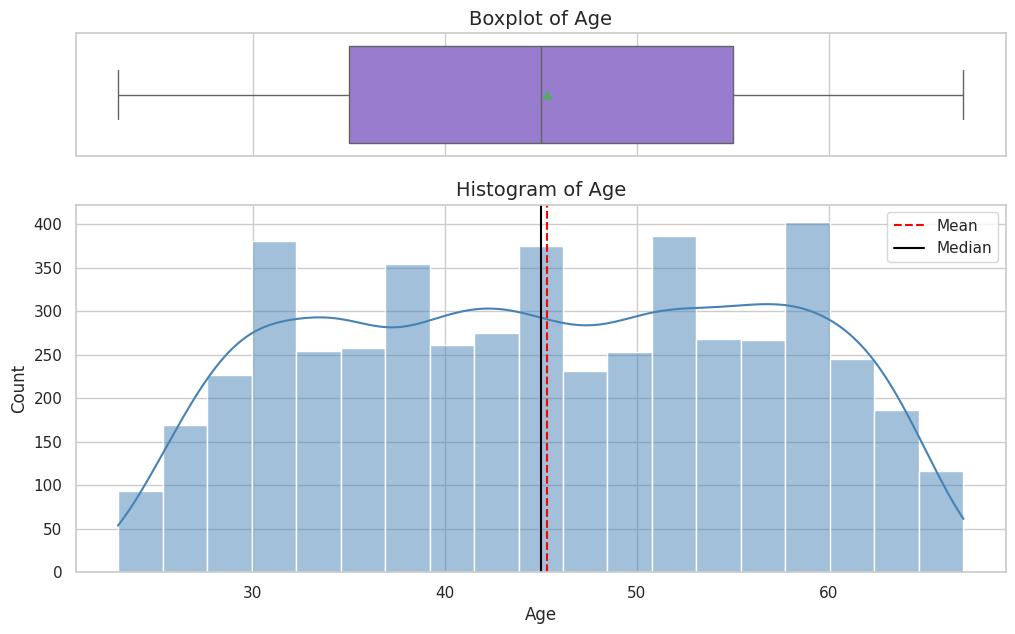


Univariate Analysis: Experience


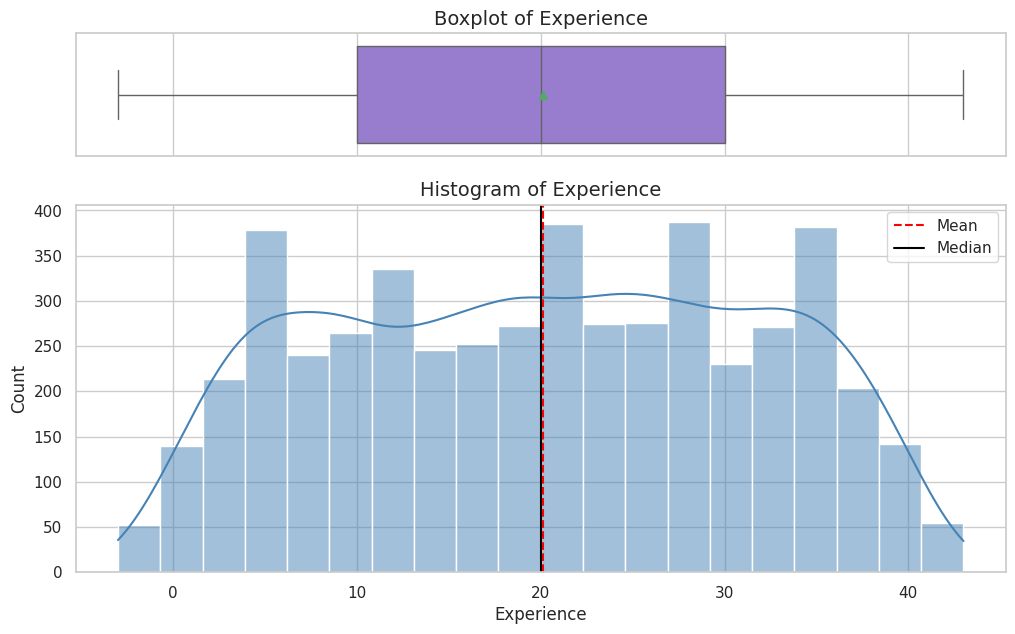


Univariate Analysis: Income


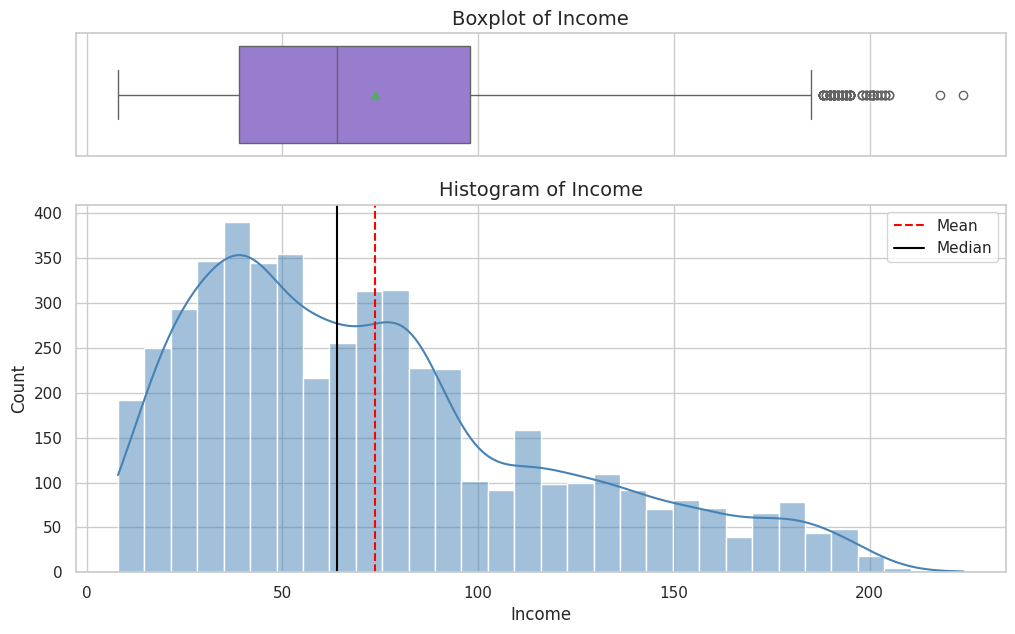


Univariate Analysis: CCAvg


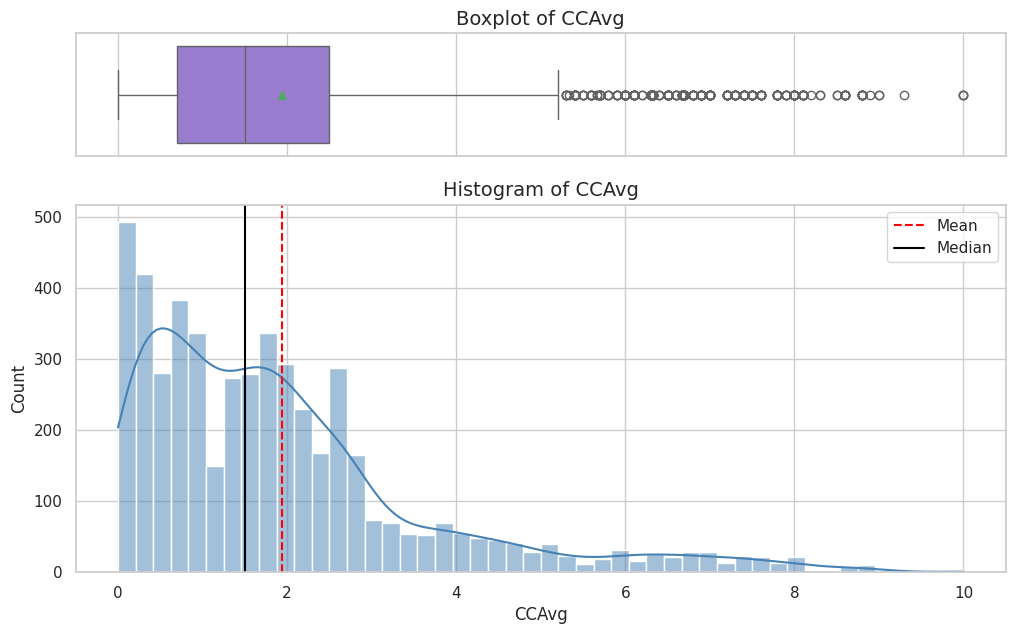


Univariate Analysis: Mortgage


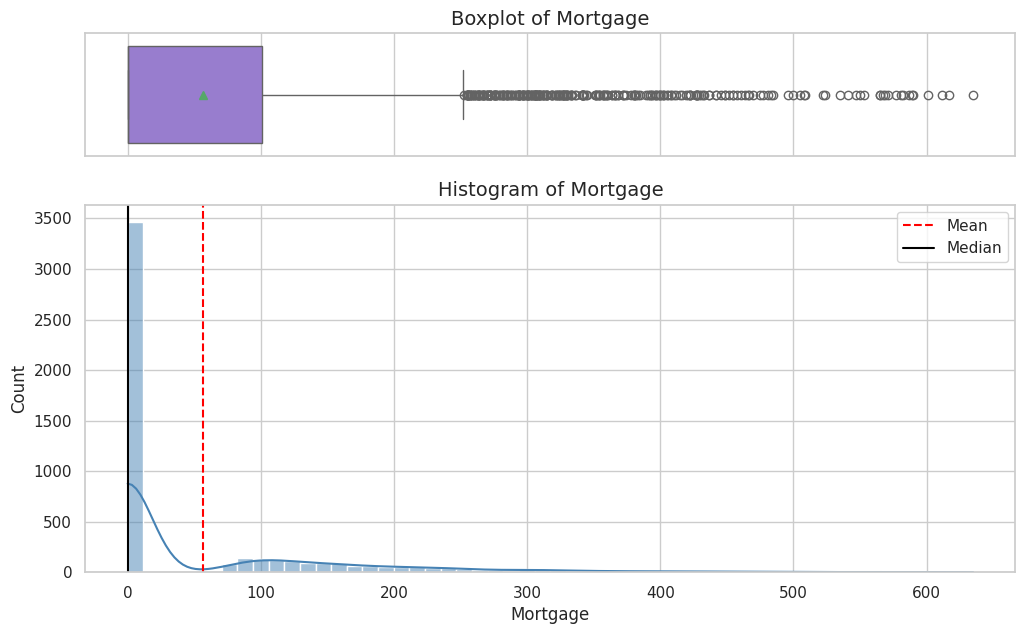

In [ ]:
for col in num_continuous:
    print("\n==============================")
    print(f"Univariate Analysis: {col}")
    print("==============================")
    histogram_boxplot(df_personal_loan, col)

Observartions:

 * Income is right-skewed, with numerous high-income outliers pushing the mean beyond the median.
 * Experience is rather equally distributed, with little skew and few outliers. * CCAvg is right-skewed, with a few high spenders serving as outliers and pushing the mean over the median.
 * age exhibits a fairly uniform distribution across middle-aged groups with no significant outliers.
 * Mortgage is significantly right-skewed with most customers having no or very low mortgage values and a lengthy tail of huge outliers.




Univariate Analysis: Family


/tmp/ipython-input-1680223712.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




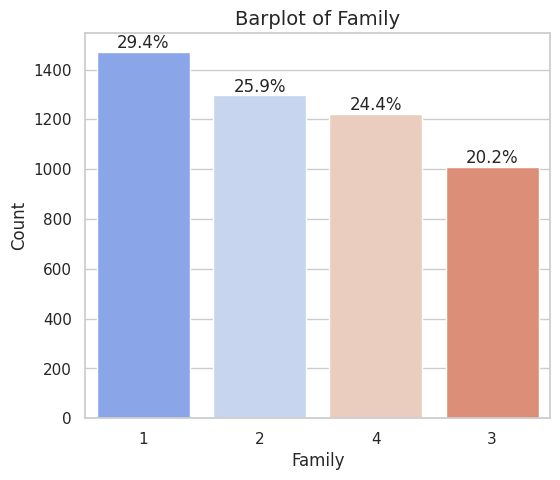


Univariate Analysis: Education


/tmp/ipython-input-1680223712.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




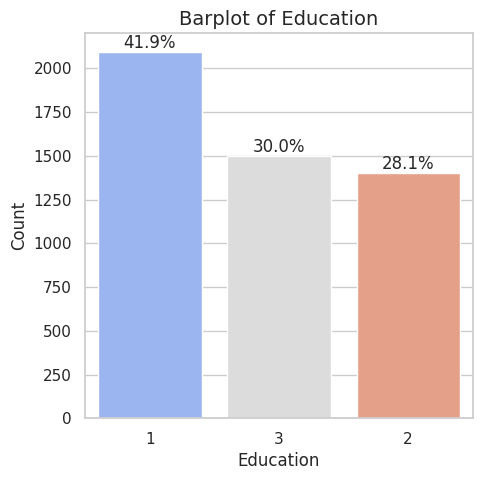


Univariate Analysis: Personal_Loan


/tmp/ipython-input-1680223712.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




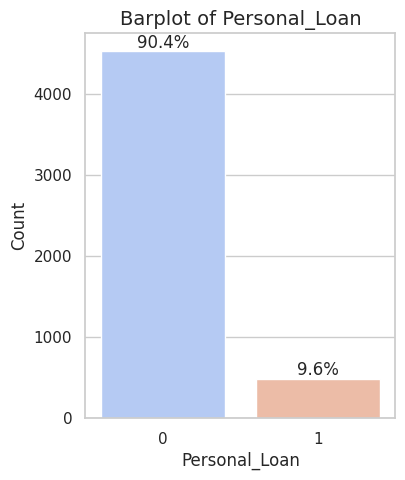


Univariate Analysis: Securities_Account


/tmp/ipython-input-1680223712.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




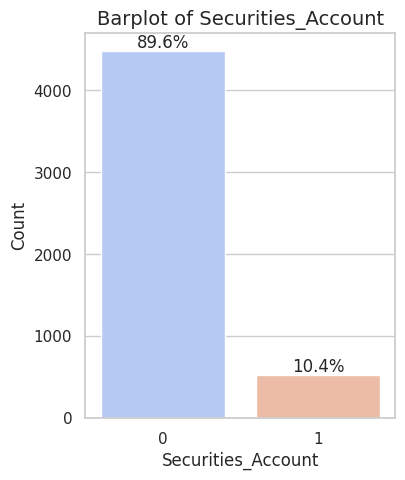


Univariate Analysis: CD_Account


/tmp/ipython-input-1680223712.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




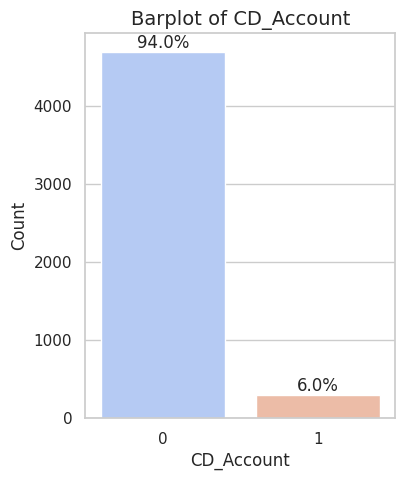


Univariate Analysis: Online


/tmp/ipython-input-1680223712.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




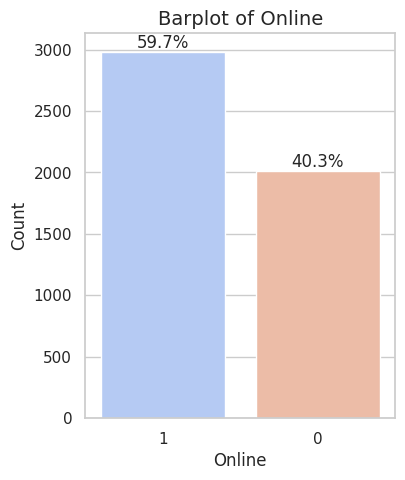


Univariate Analysis: CreditCard


/tmp/ipython-input-1680223712.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




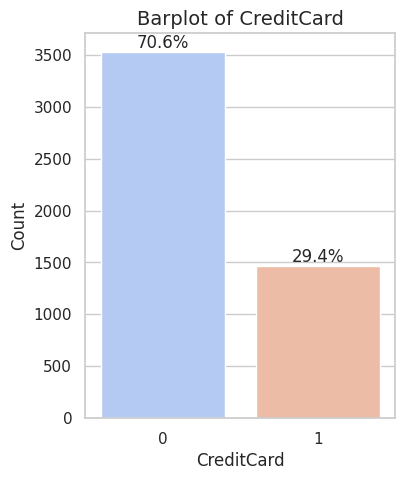

In [ ]:
for col in num_categorical:
    print("\n==============================")
    print(f"Univariate Analysis: {col}")
    print("==============================")
    labeled_barplot(df_personal_loan, col, perc=True)

Observation:
* Around ~70.6% of people do not have credit card, only ~29.4% hold one indicating low credit-card penetration.
* Around 59.7% of customers use online banking, showing majority but still a significant offline segment (~40%).
* A very small proportion ~6% hold a Certificate of Deposit account, indicating it is a niche product among customers.
* Family size 1 is the most common among customers, followed by sizes 2, 4, and 3.
* Most customers are Undergraduates, with Graduates and Advanced/Professional groups are similar.
* Major number of customers do not accept personal loan, only 10% accept it.
* Almost 90% of customers do not have a securities account with the bank.

## Bivariate Analysis

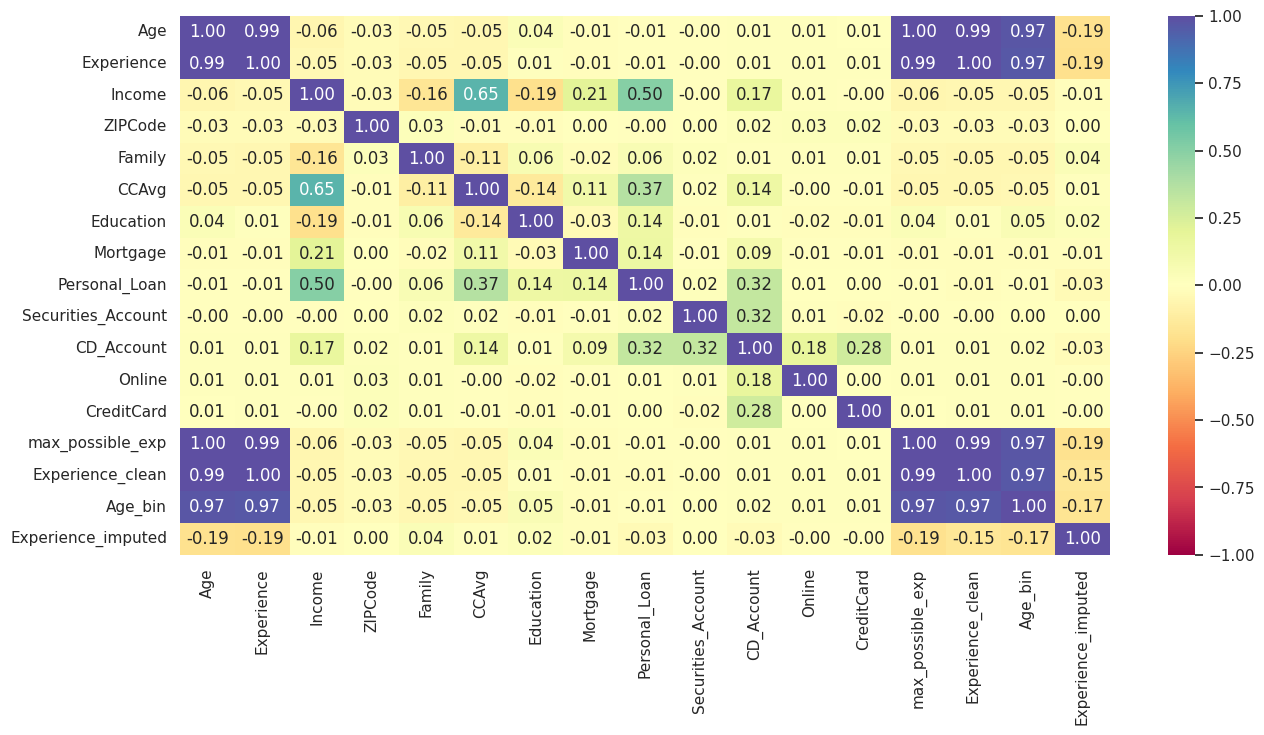

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_personal_loan.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

* Experience and age have an almost perfect positive correlation, which is to be expected given that experience rises with age.
* There is a substantial correlation between income and CCAvg, indicating that clients with greater incomes typically spend more on credit cards.
* Mortgage and Income indicate a moderate positive link - higher earners likely to have larger mortgage values.
* Financial factors like income, CCAvg, or mortgage have very little or no link with family size.
* High-income and high-spending consumers are more inclined to take out personal loans, as evidenced by the positive link between income and CCAvg.
* Richer clients invest in CDs, as seen by the positive correlation between CD accounts and income.
* The dataset does not contain any high significant negative associations.

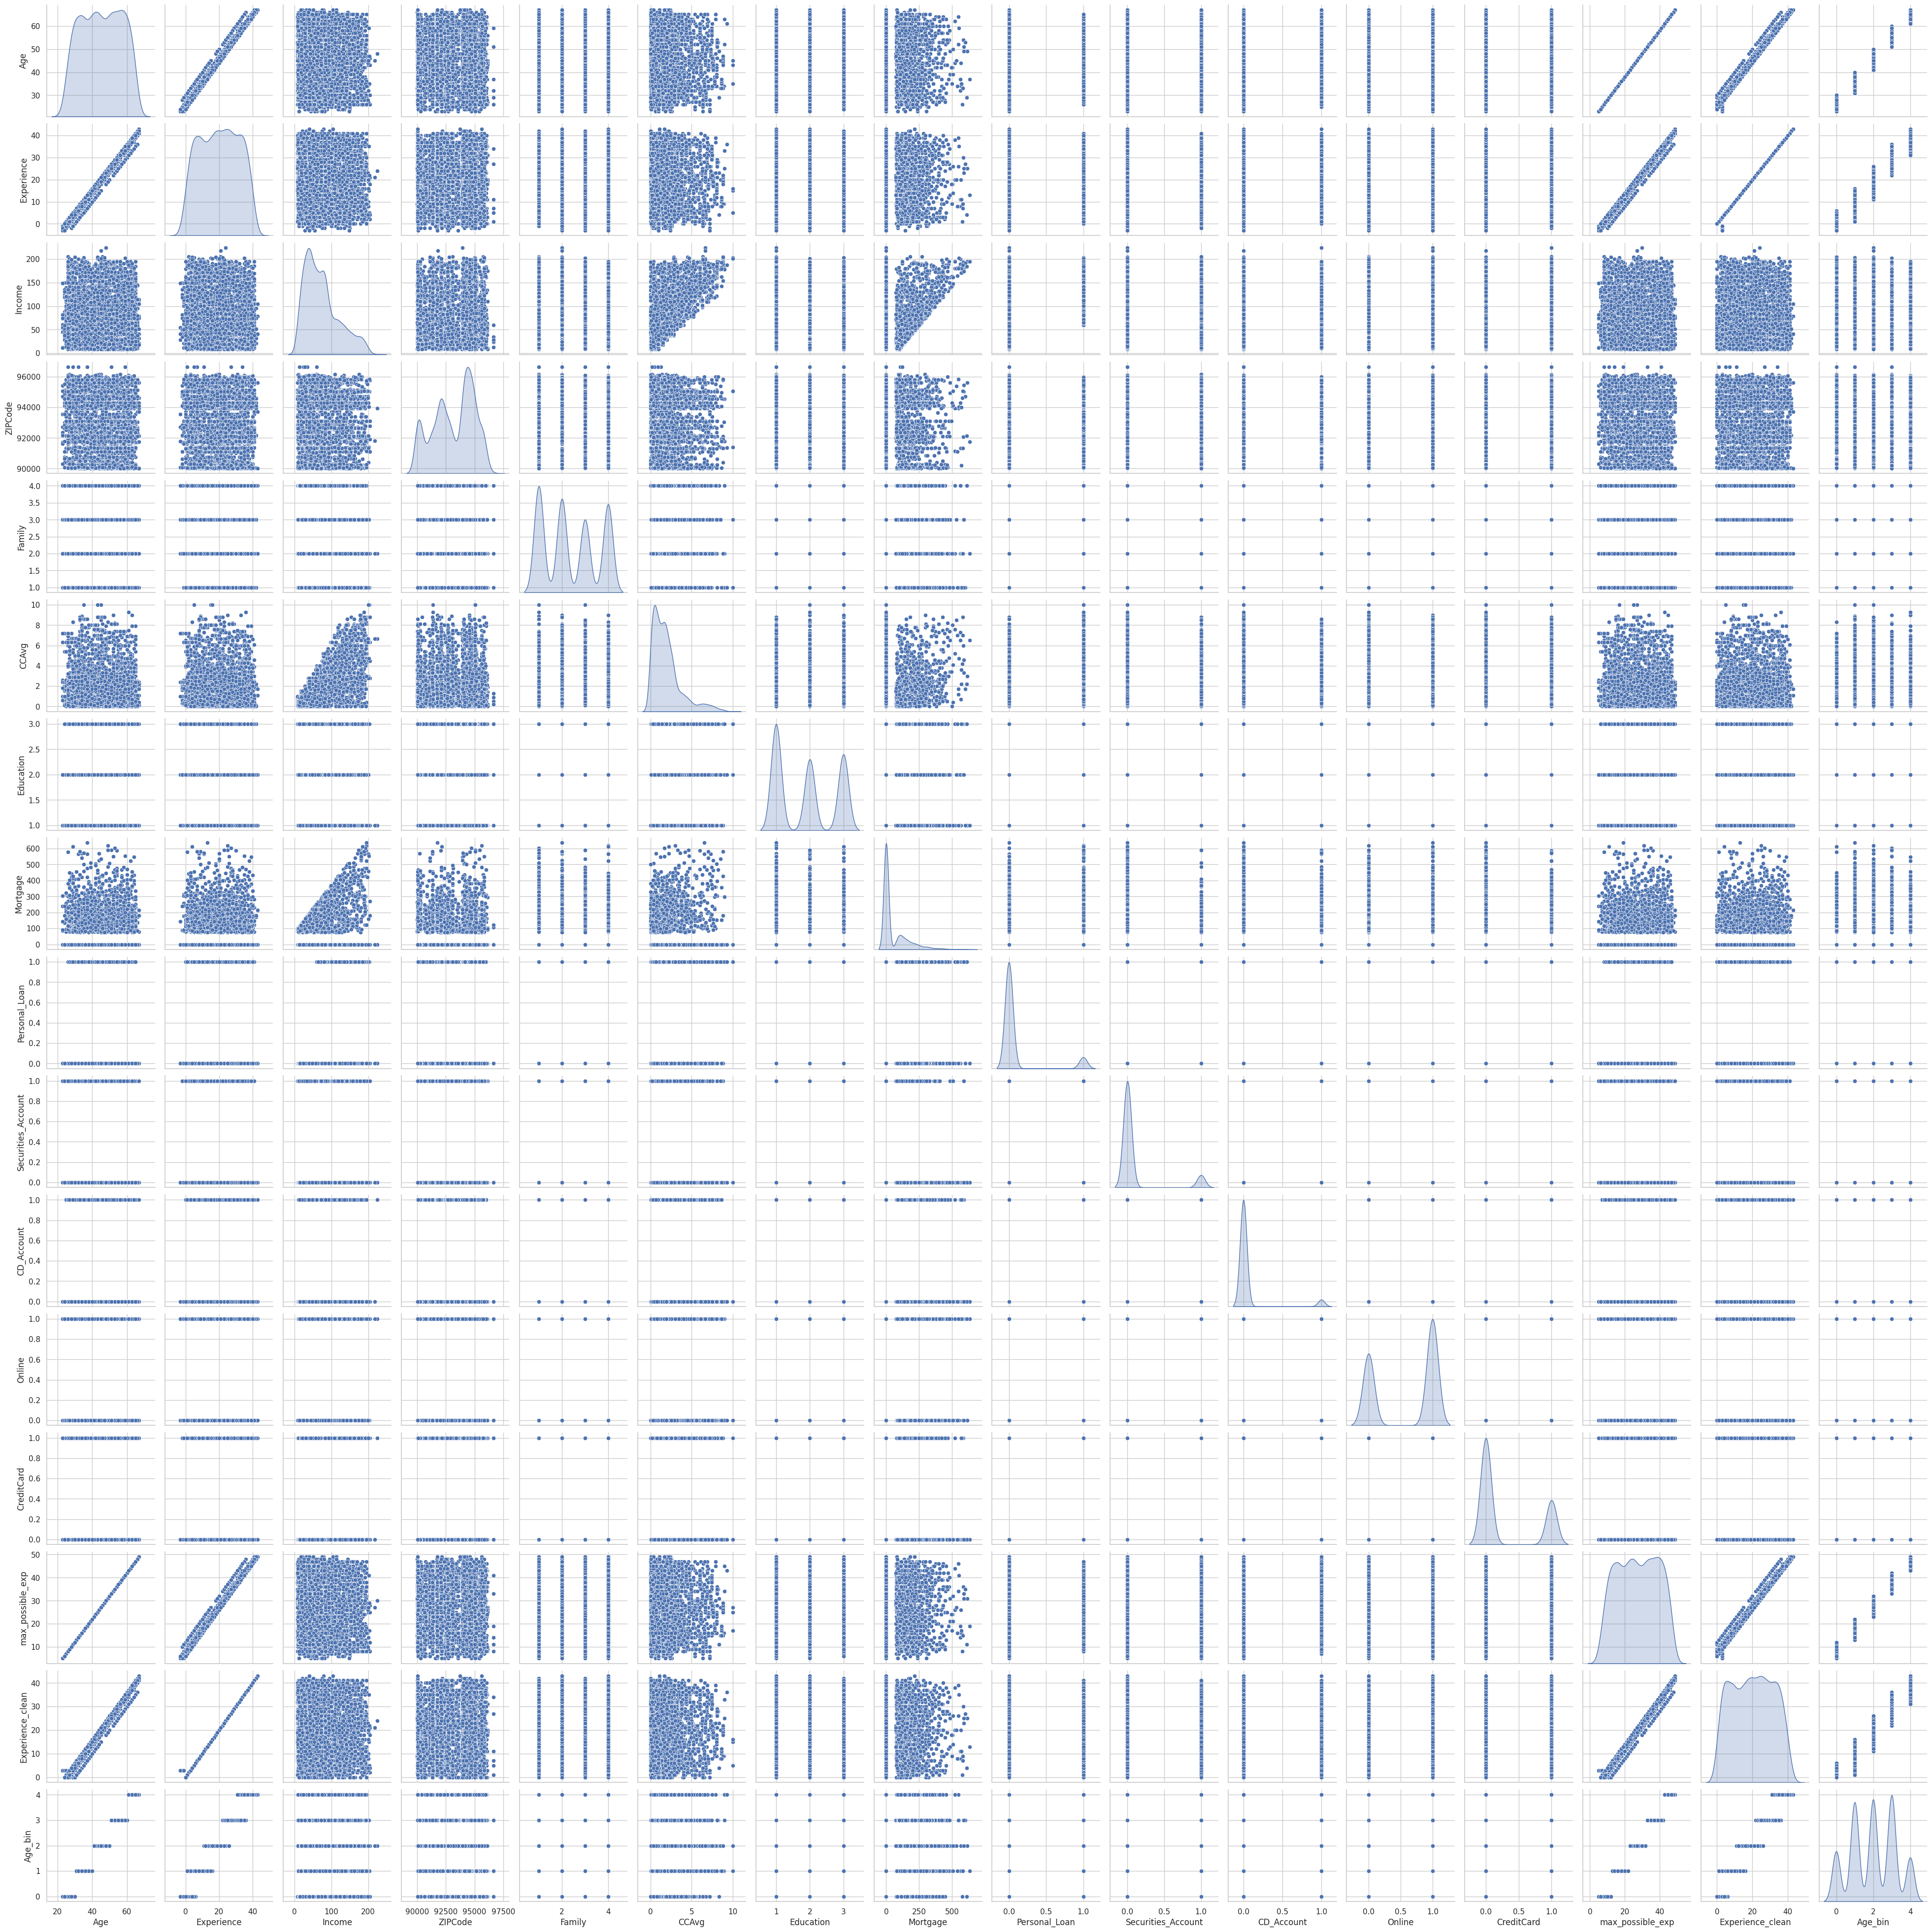

In [ ]:
sns.pairplot(data=df_personal_loan.select_dtypes(include=['int64','float64']), diag_kind="kde")
plt.show()

Observations:
* Particularly when plotted against Income and CCAvg ->, Personal Loan creates discrete, identifiable clusters that are useful for predictive modelling.
* Income vs CCAvg shows a clear upward trend — high income -> high credit card spending.
* Income vs Mortgage displays a cluster shape but still shows increasing mortgage amounts with income.
* Most numerical variables show weak or scattered relationships, reinforcing that correlations are limited to a few key variables.

In [ ]:
fig = px.scatter_3d(
    df_personal_loan,
    x='Income',
    y='CCAvg',
    z='Mortgage',
    color='Personal_Loan',
    title="3D Customer Segmentation based on Income, Spending & Mortgage"
)

fig.show()

Observation:

* Customers with high Income and high CCAvg form a distinct cluster that shows high loan acceptance.
* Customers with low Income and low spending cluster together and mostly do NOT accept the loan.
* A third group appears where customers have moderate income but high mortgage, indicating a financially stretched segment.
* Loan customers tend to lie in regions of higher Income, higher spending, or higher liabilities.

## **Data Pre-Processing**

## Outlier Detection

Boxplots for all Numeric Columns

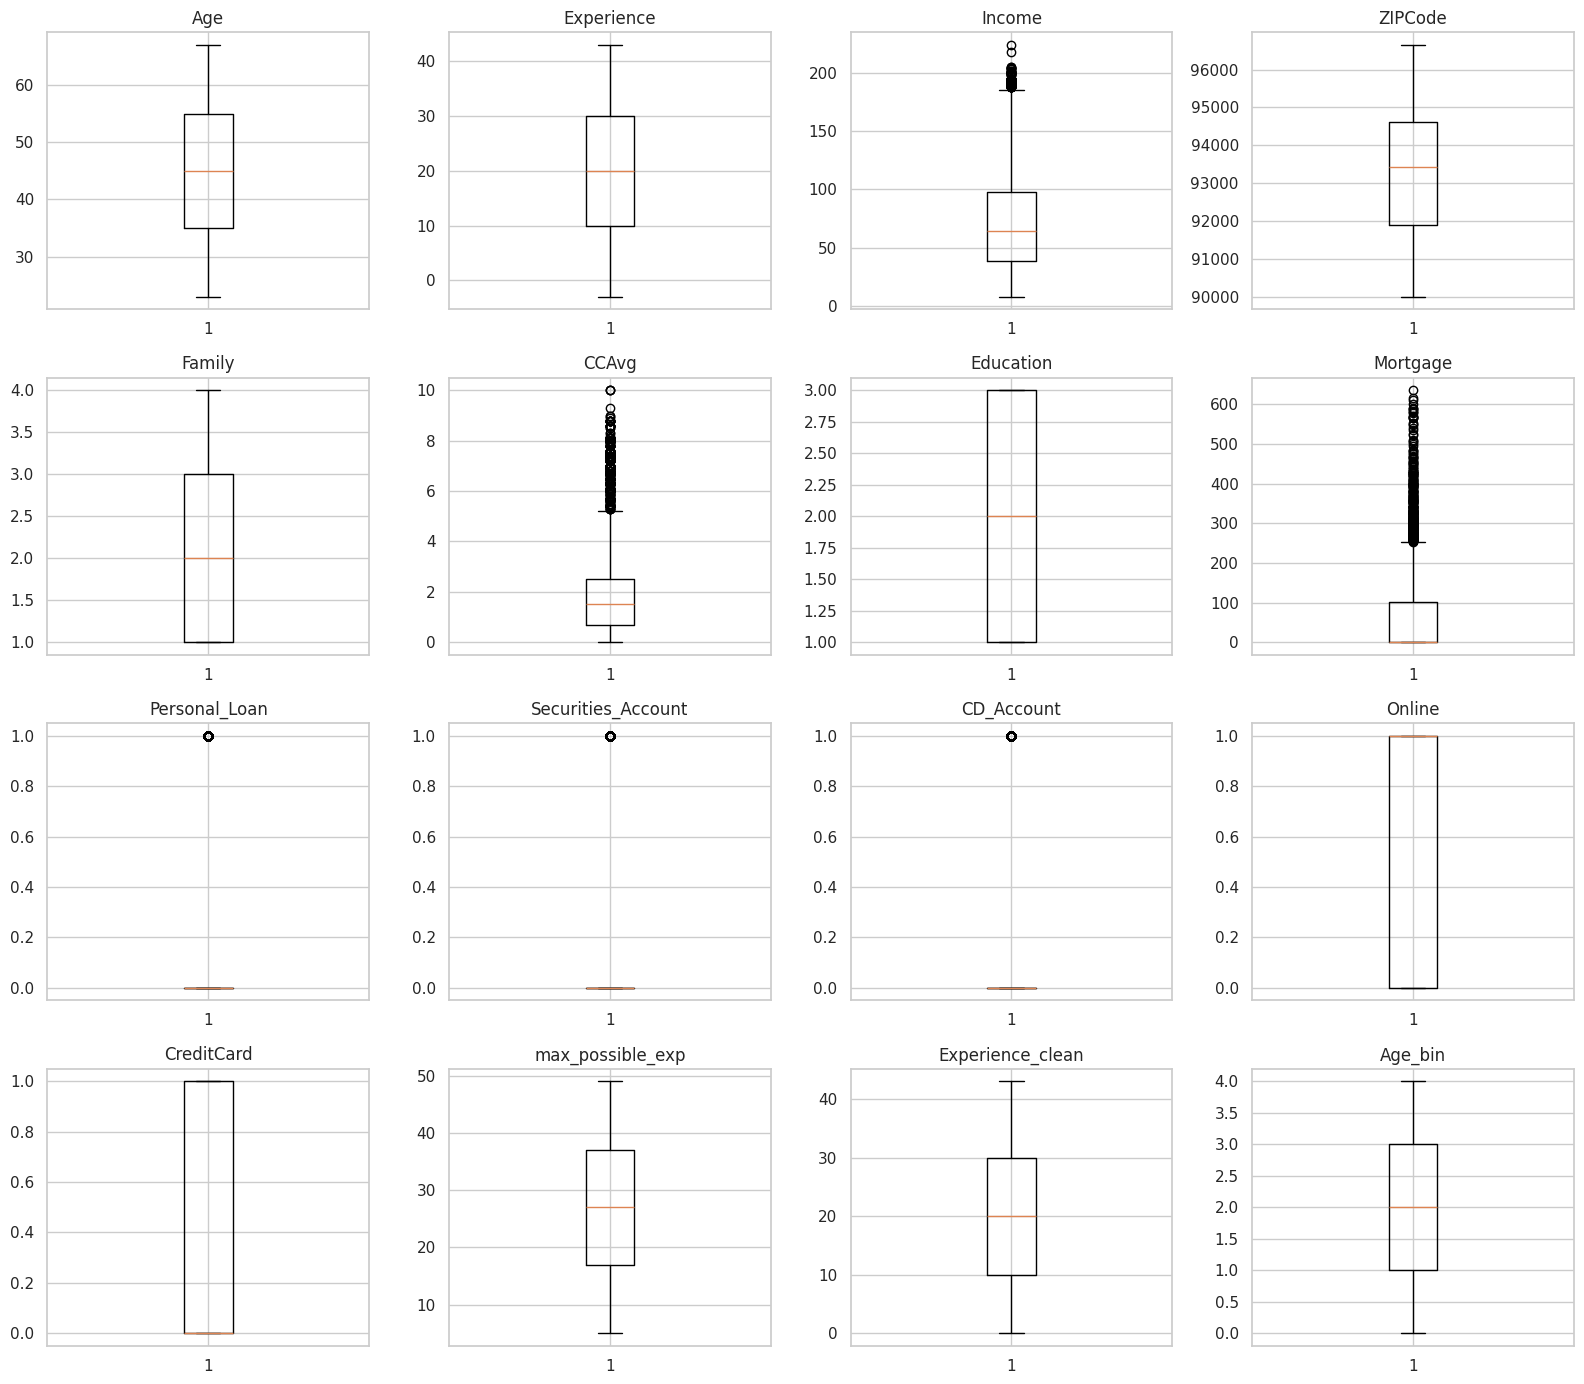

In [ ]:
numeric_columns = df_personal_loan.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(16, 14))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_personal_loan[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.show()

Observations

* Income, CCAvg, and Mortgage show visible outliers.
These outliers are expected because financial variables naturally have skewed, long-tailed distributions.

* Outliers here are not data errors.
They represent genuine high-value customers and should not be removed.
However, capping or scaling helps stabilize algorithms like t-SNE, KMeans, PCA.

* Experience_clean and Age show no unusual spikes.
Their ranges are consistent with realistic customer demographics.

* Binary variables (Online, CD_Account, CreditCard, etc.) do not have outliers.
As expected, they only take values 0/1.

In [ ]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

for col in ['Income', 'CCAvg', 'Mortgage']:
    cap_outliers(df_personal_loan, col)

In [ ]:
# help understand segment-level behavior.
df_personal_loan['Age_bin'] = pd.cut(
    df_personal_loan['Age'],
    bins=[18, 30, 45, 60, 100],
    labels=['Young', 'Mid-Age', 'Mature', 'Senior']
)

In [ ]:
model_df = df_personal_loan.drop(['ID','ZIPCode'], axis=1, errors='ignore')

## Scaling the Data

In [ ]:
numeric_cols = model_df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Personal_Loan')   # target

scaler = StandardScaler()
scaled_data = scaler.fit_transform(model_df[numeric_cols])

scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# t-SNE Dimensionality Reduction (2D)

In [ ]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-2)
tsne_2d = tsne.fit_transform(scaled_df)

tsne_2d_df = pd.DataFrame(tsne_2d, columns=['Feature 1', 'Feature 2'])
tsne_2d_df['Loan'] = df_personal_loan['Personal_Loan']

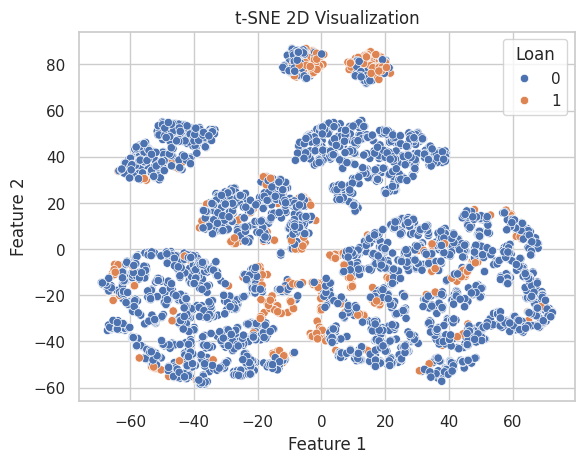

In [ ]:
sns.scatterplot(data=tsne_2d_df, x="Feature 1", y="Feature 2", hue="Loan")
plt.title("t-SNE 2D Visualization")
plt.show()

1. The t-SNE plot displays a number of dense zones, suggesting that consumers naturally divide into subgroups according to their financial habits.
2. Personal loan clients (orange) exhibit overlap with non-loan clients and are dispersed rather than forming a close, isolated cluster.
3. In line with previous EDA, the loan-takers seem to be somewhat concentrated in locations that correspond to greater income/credit-spending trends.
4. A model is necessary for accurate classification because the visual distinction is weak, indicating that personal loan behaviour is heterogeneous among the population.
5. The lack of a robust cluster-level separation suggests that feature-driven modelling is required in order to identify loan-prone customers through segmentation alone.

## t-SNE for multiple perplexities

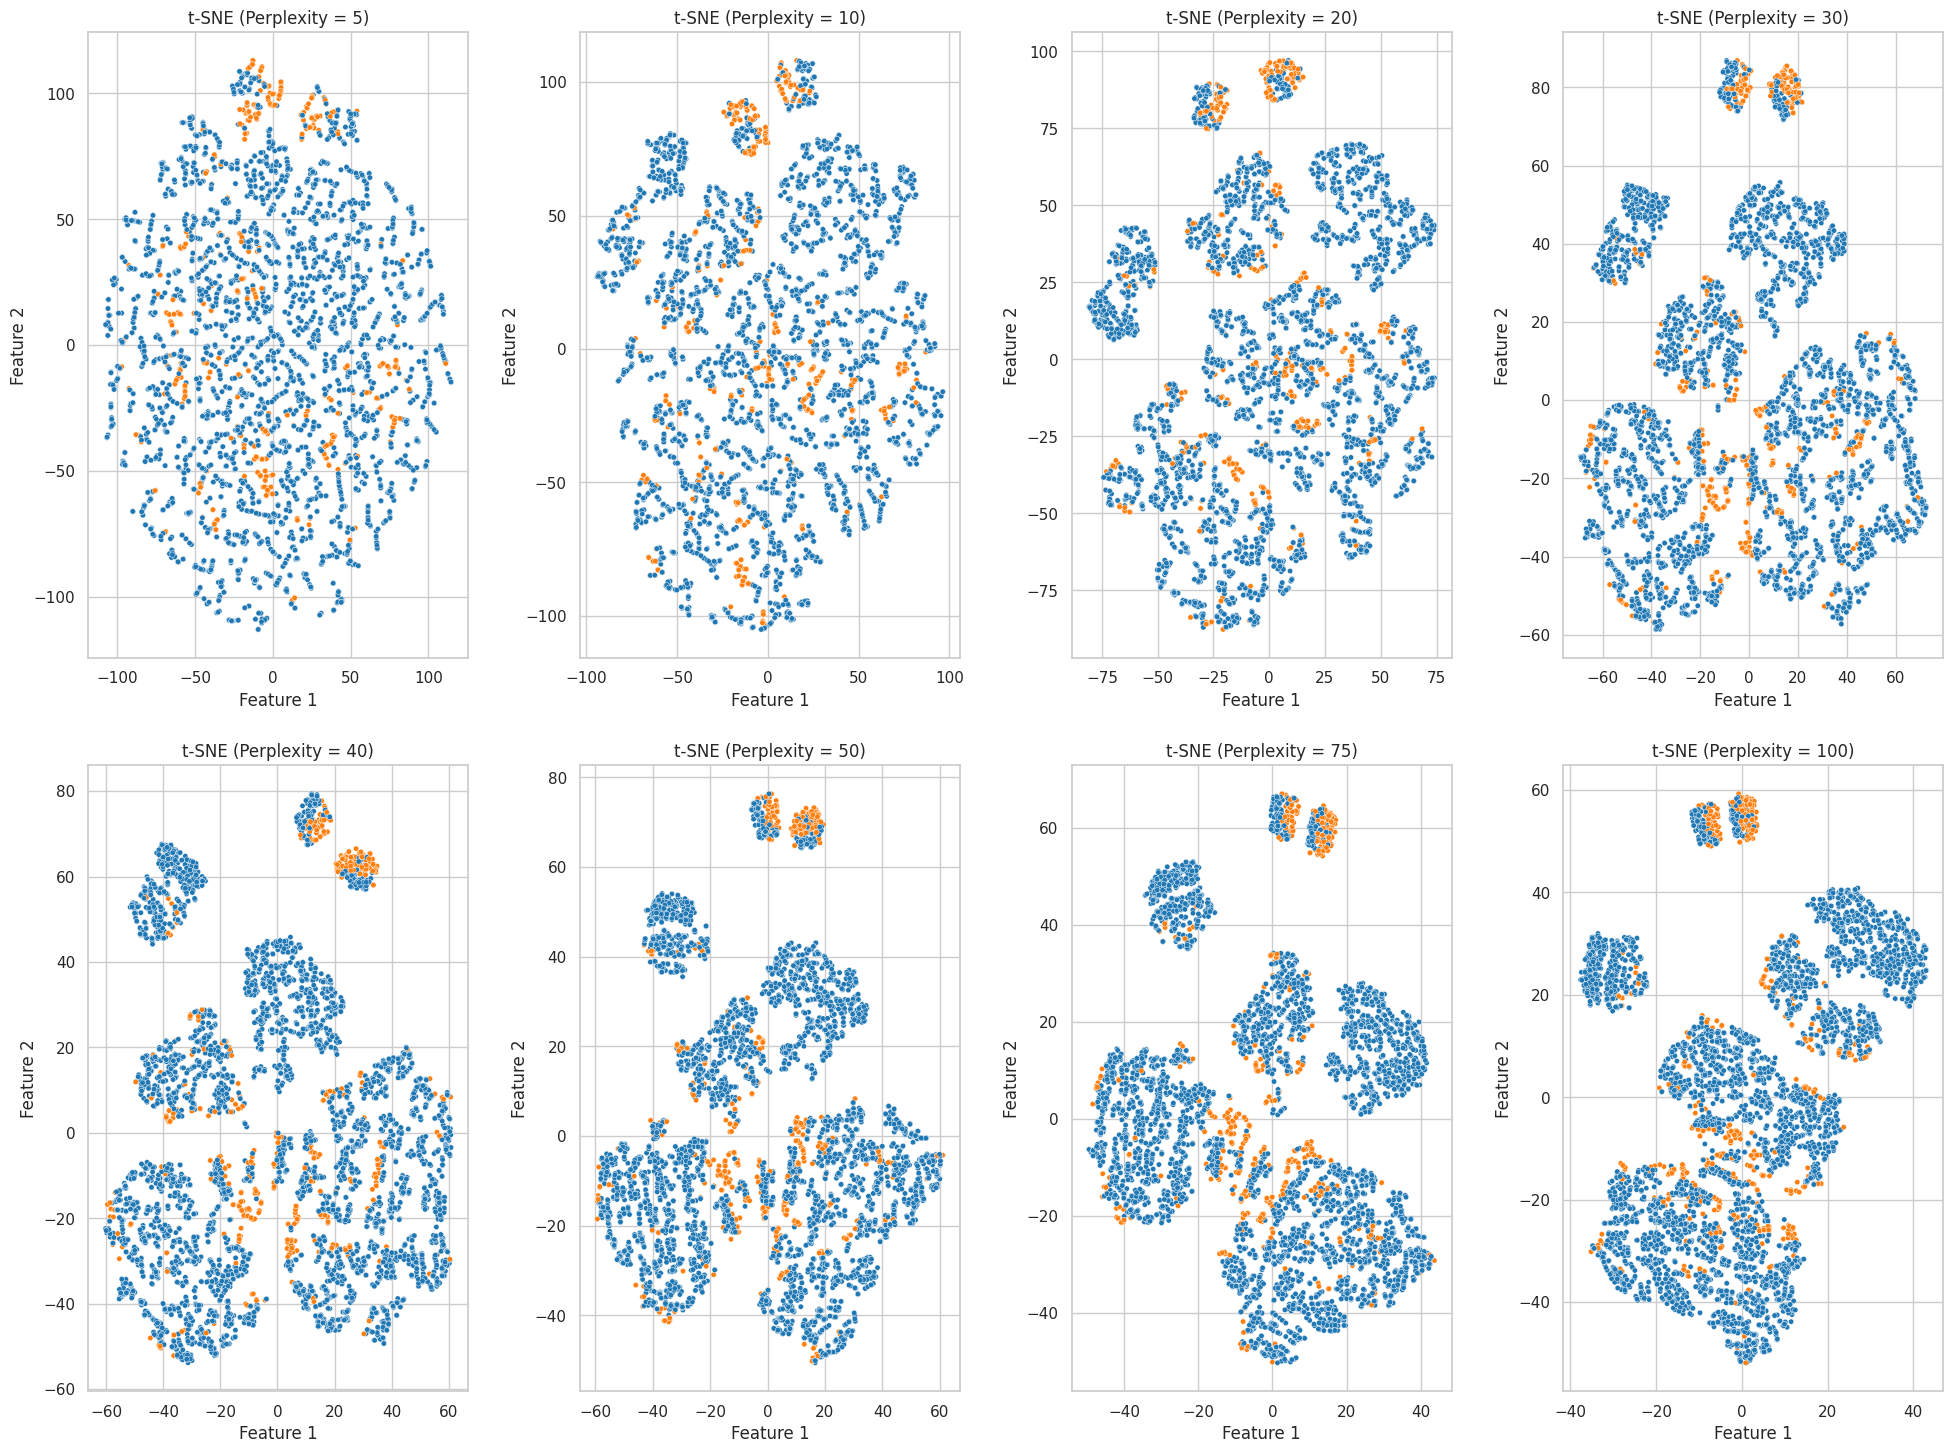

In [ ]:
perplexities = [5, 10, 20, 30, 40, 50, 75, 100]

plt.figure(figsize=(20, 15))

for i, perp in enumerate(perplexities):

    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        random_state=42,
        n_jobs=-2
    )

    tsne_result = tsne.fit_transform(scaled_df)
    tsne_df = pd.DataFrame(tsne_result, columns=['Feature 1', 'Feature 2'])

    tsne_df['Loan'] = df_personal_loan['Personal_Loan']

    plt.subplot(2, 4, i + 1)
    sns.scatterplot(
        data=tsne_df,
        x="Feature 1",
        y="Feature 2",
        hue="Loan",
        s=15,
        palette="tab10",
        legend=False
    )
    plt.title(f"t-SNE (Perplexity = {perp})")
    plt.tight_layout(pad=2)

plt.show()

Observations:

Low perplexity values (5-10) produce sparse, noisy cluster structures with poor global organization.

Mid-range perplexity values (30-50) create the most stable and meaningful local clusters.

High values (75-100) over-smooth the embedding and mix groups together.

Perplexity ~50 provides the best visual balance and was chosen for further dimensionality reduction.


In [ ]:
tsne_2d_latest = TSNE(n_components=2, perplexity=50, n_jobs=-2, random_state=42)
tsne_reduced_data = tsne_2d_latest.fit_transform(scaled_df)

tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"]))
tsne_2d_data.head()

Feature 1  Feature 2
0 -39.882030  43.969990
1 -35.736824  42.424313
2 -35.620670 -13.541166
3 -31.253813 -34.267593
4 -12.566113  27.147686

## 3D t-SNE

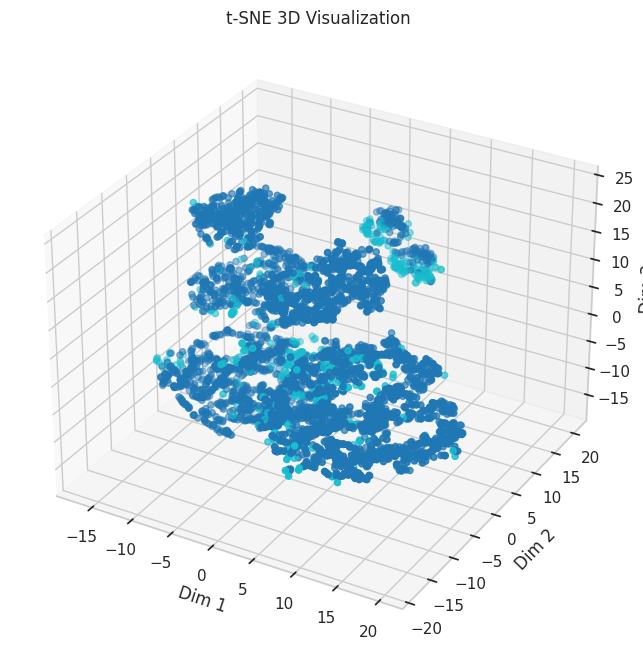

In [ ]:
tsne_3d = TSNE(
    n_components=3,
    perplexity=50,
    random_state=42,
    n_jobs=-2
)

tsne_3d_result = tsne_3d.fit_transform(scaled_df)

tsne_3d_df = pd.DataFrame(tsne_3d_result, columns=['Dim1', 'Dim2', 'Dim3'])
tsne_3d_df['Loan'] = df_personal_loan['Personal_Loan']

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_3d_df['Dim1'],
    tsne_3d_df['Dim2'],
    tsne_3d_df['Dim3'],
    c=tsne_3d_df['Loan'],
    cmap='tab10',
    s=20
)

ax.set_title("t-SNE 3D Visualization")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")

plt.show()

## Model building — Decision Tree


In [ ]:
if 'model_df' not in globals():
    model_df = df_personal_loan.drop(columns=['ID','ZIPCode'], errors='ignore').copy()

# Create X, y
X = model_df.drop(columns=['Personal_Loan'])
y = model_df['Personal_Loan']
X = pd.get_dummies(X, drop_first=True)

# Train-test split (stratify by target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("X shape:", X.shape, "X_train:", X_train.shape, "X_test:", X_test.shape)

X shape: (5000, 17) X_train: (3750, 17) X_test: (1250, 17)


Evaluation metrics: recall prioritized (to find potential buyers), plus precision, F1 and ROC AUC for overall performance.

## Baseline Decision Tree (unpruned)

In [ ]:
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

# Predict + metrics
y_pred = dt_base.predict(X_test)
y_proba = dt_base.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1130
           1       0.85      0.93      0.89       120

    accuracy                           0.98      1250
   macro avg       0.92      0.96      0.94      1250
weighted avg       0.98      0.98      0.98      1250

Confusion matrix:
 [[1110   20]
 [   8  112]]
ROC AUC: 0.9578171091445428


Baseline Decision Tree trained (pre - pruning). Record baseline metrics (precision, recall, F1, AUC) for comparison with pruned models.

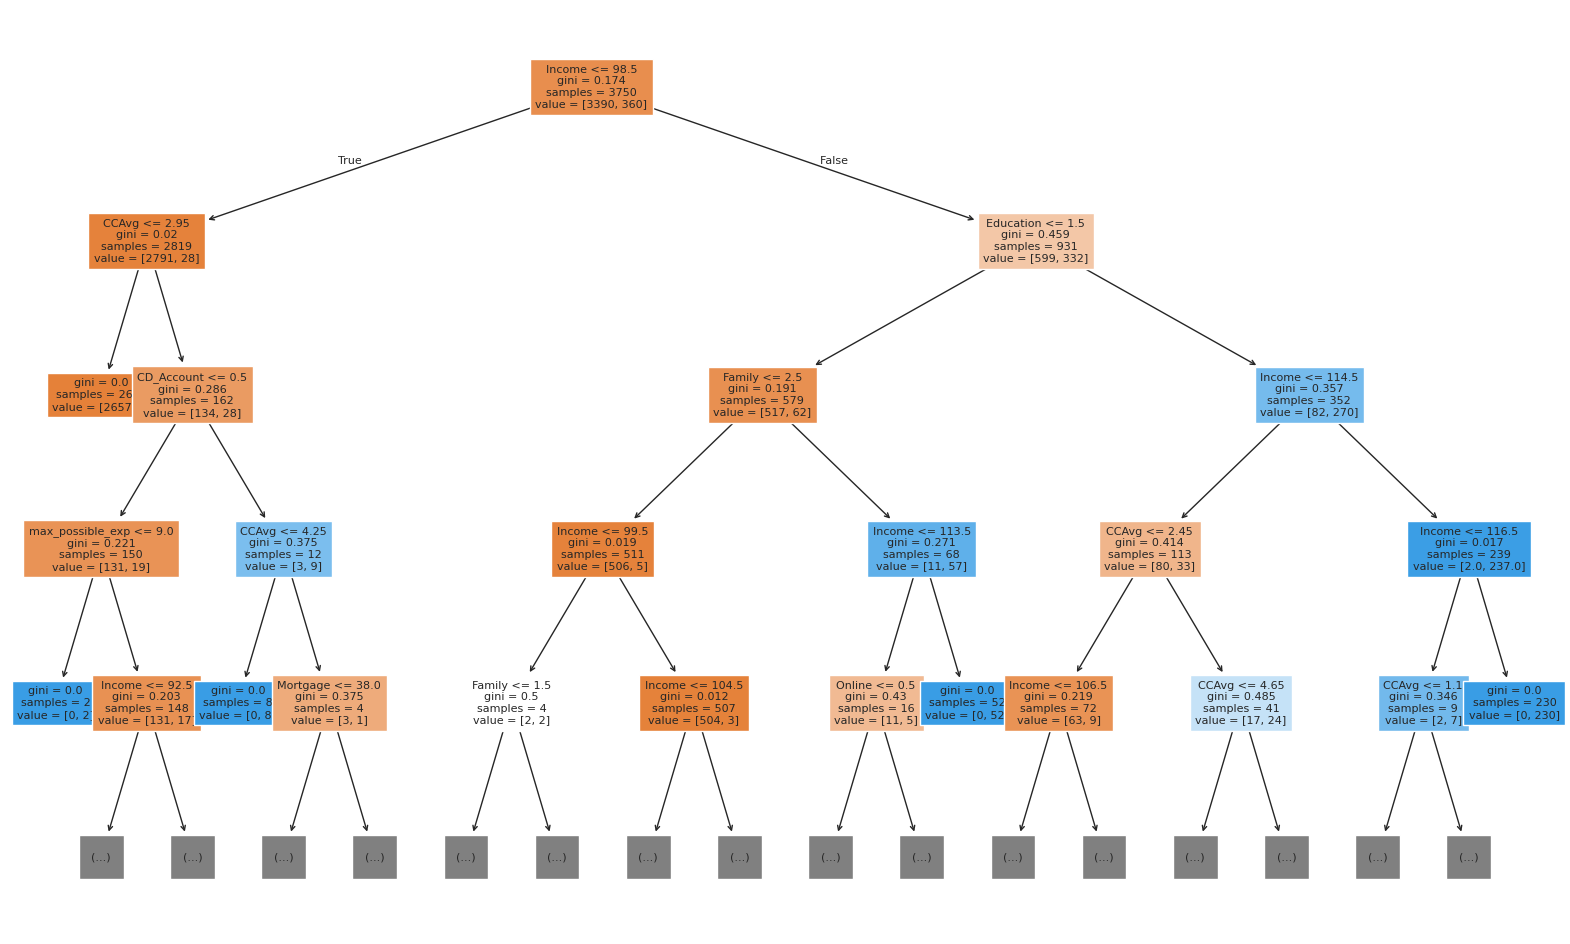

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- max_possible_exp <= 9.00
|   |   |   |   |--- class: 1
|   |   |   |--- max_possible_exp >  9.00
|   |   |   |   |--- Income <= 92.50
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Experience <= 18.50
|   |   |   |   |   |   |   |   |   |--- Experience <= 17.50
|   |   |   |   |   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Experience >  17.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Experience >  18.50
|   |   |   |   |   |   |   |   |   |--- 

In [ ]:
plt.figure(figsize=(20,12))
plot_tree(dt_base, feature_names=X.columns, max_depth=4, filled=True, fontsize=8)
plt.show()
rules = export_text(dt_base, feature_names=list(X.columns))
print(rules[:2000])

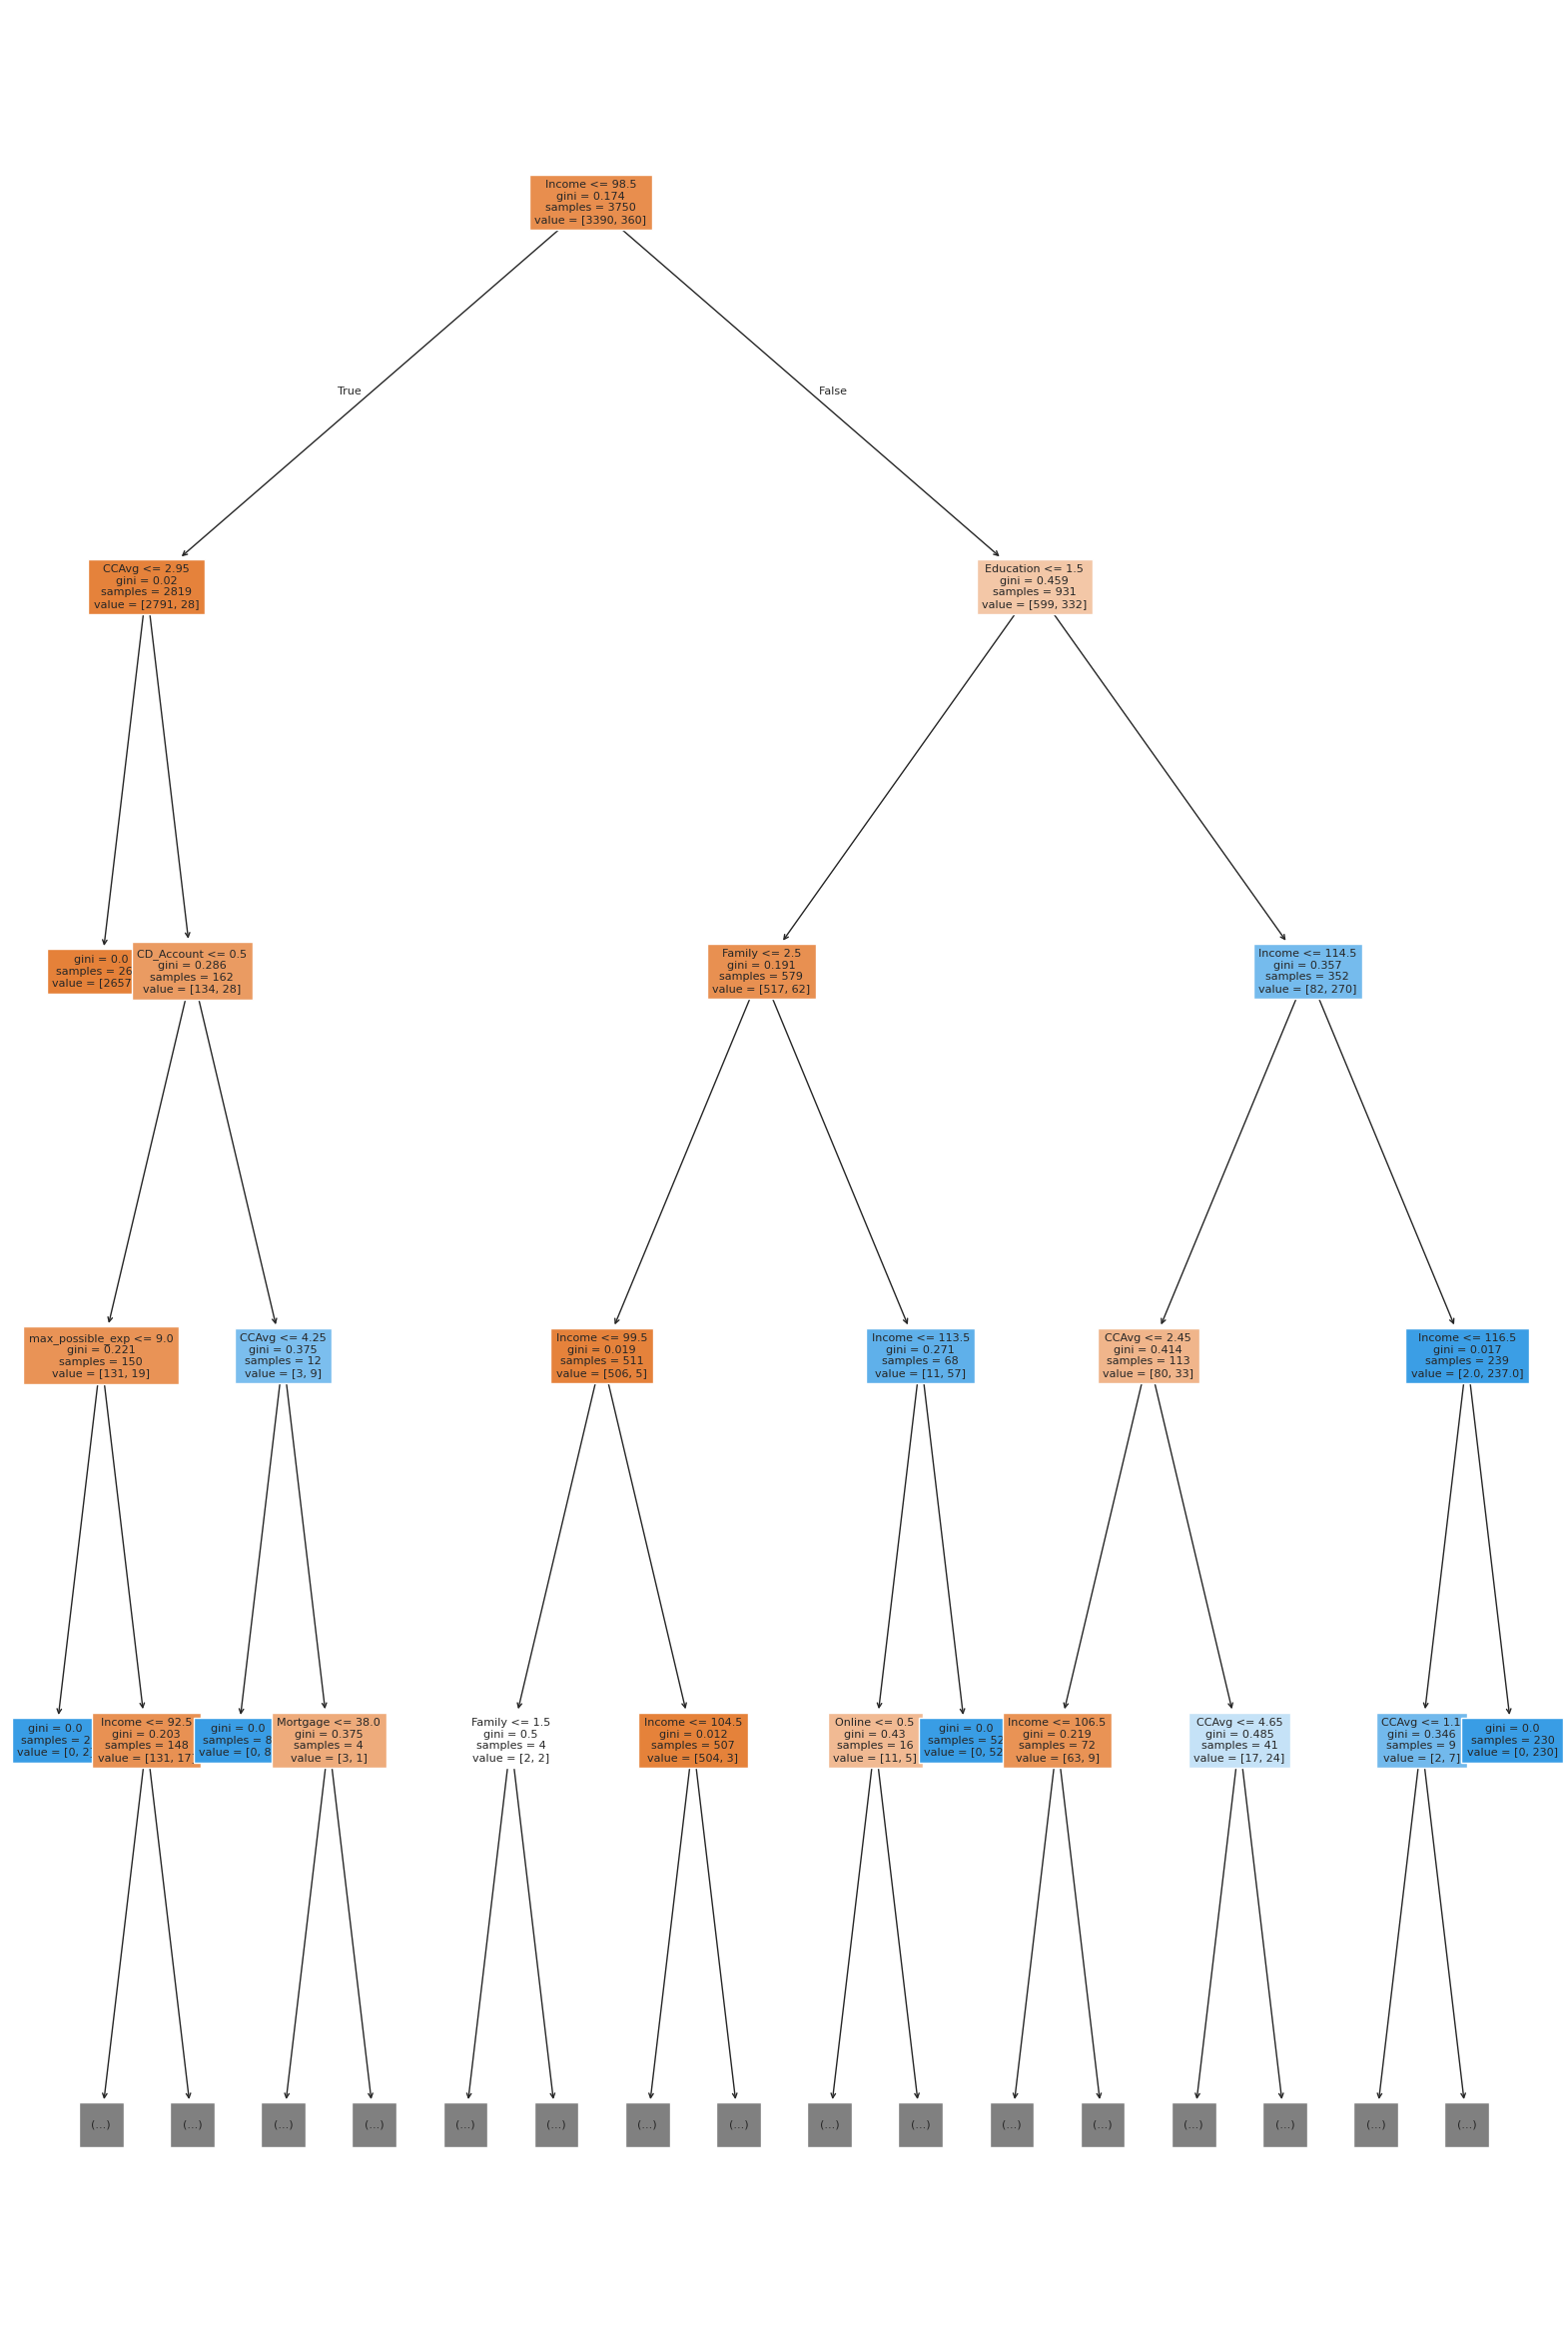

In [ ]:
plt.figure(figsize=(20,30))
out = plot_tree(dt_base, feature_names=X.columns, filled=True, max_depth=4, fontsize=8)
plt.show()

Baseline tree visualized (limited depth). Exported textual decision rules for interpretability.

Income                0.409273
Education             0.298360
Family                0.147750
CCAvg                 0.056417
CD_Account            0.016031
max_possible_exp      0.015130
Mortgage              0.014375
Experience            0.012162
Age                   0.010606
Experience_clean      0.008504
Online                0.006680
Age_bin_Mature        0.003687
Age_bin_Mid-Age       0.001024
Securities_Account    0.000000
CreditCard            0.000000
Experience_imputed    0.000000
Age_bin_Senior        0.000000
dtype: float64

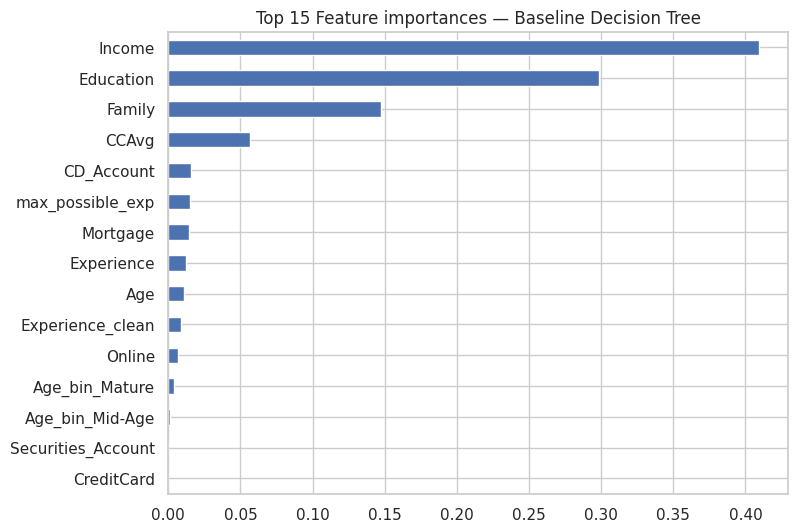

In [ ]:
importances = pd.Series(dt_base.feature_importances_, index=X.columns).sort_values(ascending=False)
display(importances.head(20))

plt.figure(figsize=(8,6))
importances.head(15).plot(kind='barh')
plt.title('Top 15 Feature importances — Baseline Decision Tree')
plt.gca().invert_yaxis()
plt.show()

Baseline feature importance shows which predictors the tree used most; this guides pruning and feature selection.

## Pre-pruning (GridSearch over max_depth, min_samples_leaf, min_samples_split)

In [ ]:
param_grid = {
    'max_depth': [3,5,7,9,12],
    'min_samples_leaf': [5,10,20,50],
    'min_samples_split': [2,10,20]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid,
                    scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_pre = grid.best_estimator_

# Evaluate best_pre on test
y_pred_pre = best_pre.predict(X_test)
y_proba_pre = best_pre.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred_pre))
print("ROC AUC (pre-pruned):", roc_auc_score(y_test, y_proba_pre))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params: {'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.89      0.87      0.88       120

    accuracy                           0.98      1250
   macro avg       0.94      0.93      0.93      1250
weighted avg       0.98      0.98      0.98      1250

ROC AUC (pre-pruned): 0.9920833333333333


Performed grid search for pre-pruning; best params recorded and evaluated on test set for comparison.

## Post-pruning

In [ ]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = np.unique(ccp_alphas)  # clean
ccp_alphas = ccp_alphas[ccp_alphas > 0]  # drop zero if present

clfs = []
cv_scores = []
for ccp in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='roc_auc')
    clfs.append(dt)
    cv_scores.append(scores.mean())

# pick best alpha (max cv score)
best_idx = np.argmax(cv_scores)
best_alpha = ccp_alphas[best_idx]
print("Best ccp_alpha:", best_alpha, "with CV ROC-AUC:", cv_scores[best_idx])

# retrain final pruned tree on full training set with best_alpha
dt_post = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_post.fit(X_train, y_train)

y_pred_post = dt_post.predict(X_test)
y_proba_post = dt_post.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred_post))
print("ROC AUC (post-pruned):", roc_auc_score(y_test, y_proba_post))

Best ccp_alpha: 0.002302485596707815 with CV ROC-AUC: 0.9765322844968862
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.95      0.92      0.93       120

    accuracy                           0.99      1250
   macro avg       0.97      0.96      0.96      1250
weighted avg       0.99      0.99      0.99      1250

ROC AUC (post-pruned): 0.996231563421829


Post-pruning via cost-complexity pruning chosen by cross-validated ROC-AUC; performance measured on test set.

Compare models (baseline, pre-pruned, post-pruned) — tabulate metrics

In [ ]:
models = {
    'baseline': dt_base,
    'pre_pruned': best_pre,
    'post_pruned': dt_post
}

rows = []
for name, m in models.items():
    y_pred_m = m.predict(X_test)
    y_proba_m = m.predict_proba(X_test)[:,1]
    rows.append({
        'model': name,
        'accuracy': accuracy_score(y_test, y_pred_m),
        'precision': precision_score(y_test, y_pred_m, zero_division=0),
        'recall': recall_score(y_test, y_pred_m, zero_division=0),
        'f1': f1_score(y_test, y_pred_m, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_proba_m)
    })

pd.DataFrame(rows).set_index('model').T

model      baseline  pre_pruned  post_pruned
accuracy   0.977600    0.976800     0.987200
precision  0.848485    0.888889     0.948276
recall     0.933333    0.866667     0.916667
f1         0.888889    0.877637     0.932203
roc_auc    0.957817    0.992083     0.996232

Income                0.464993
Education             0.347883
Family                0.150281
CCAvg                 0.036843
Age                   0.000000
Experience            0.000000
Mortgage              0.000000
Securities_Account    0.000000
CD_Account            0.000000
Online                0.000000
CreditCard            0.000000
max_possible_exp      0.000000
Experience_clean      0.000000
Experience_imputed    0.000000
Age_bin_Mid-Age       0.000000
Age_bin_Mature        0.000000
Age_bin_Senior        0.000000
dtype: float64

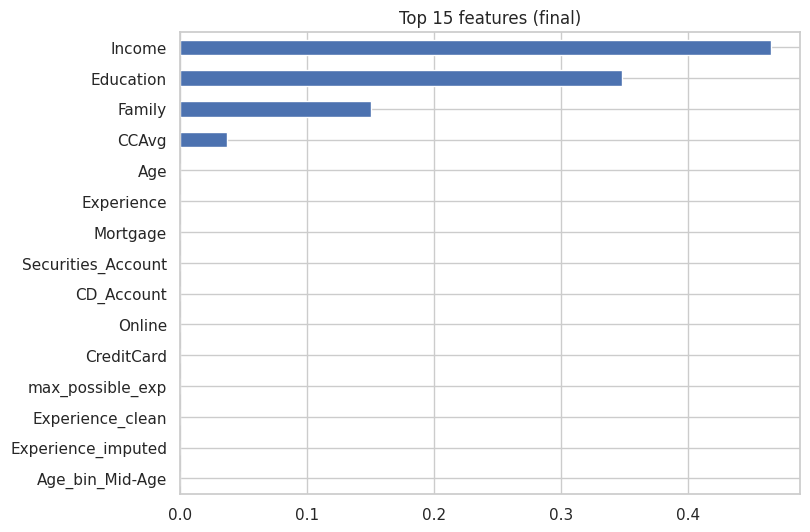

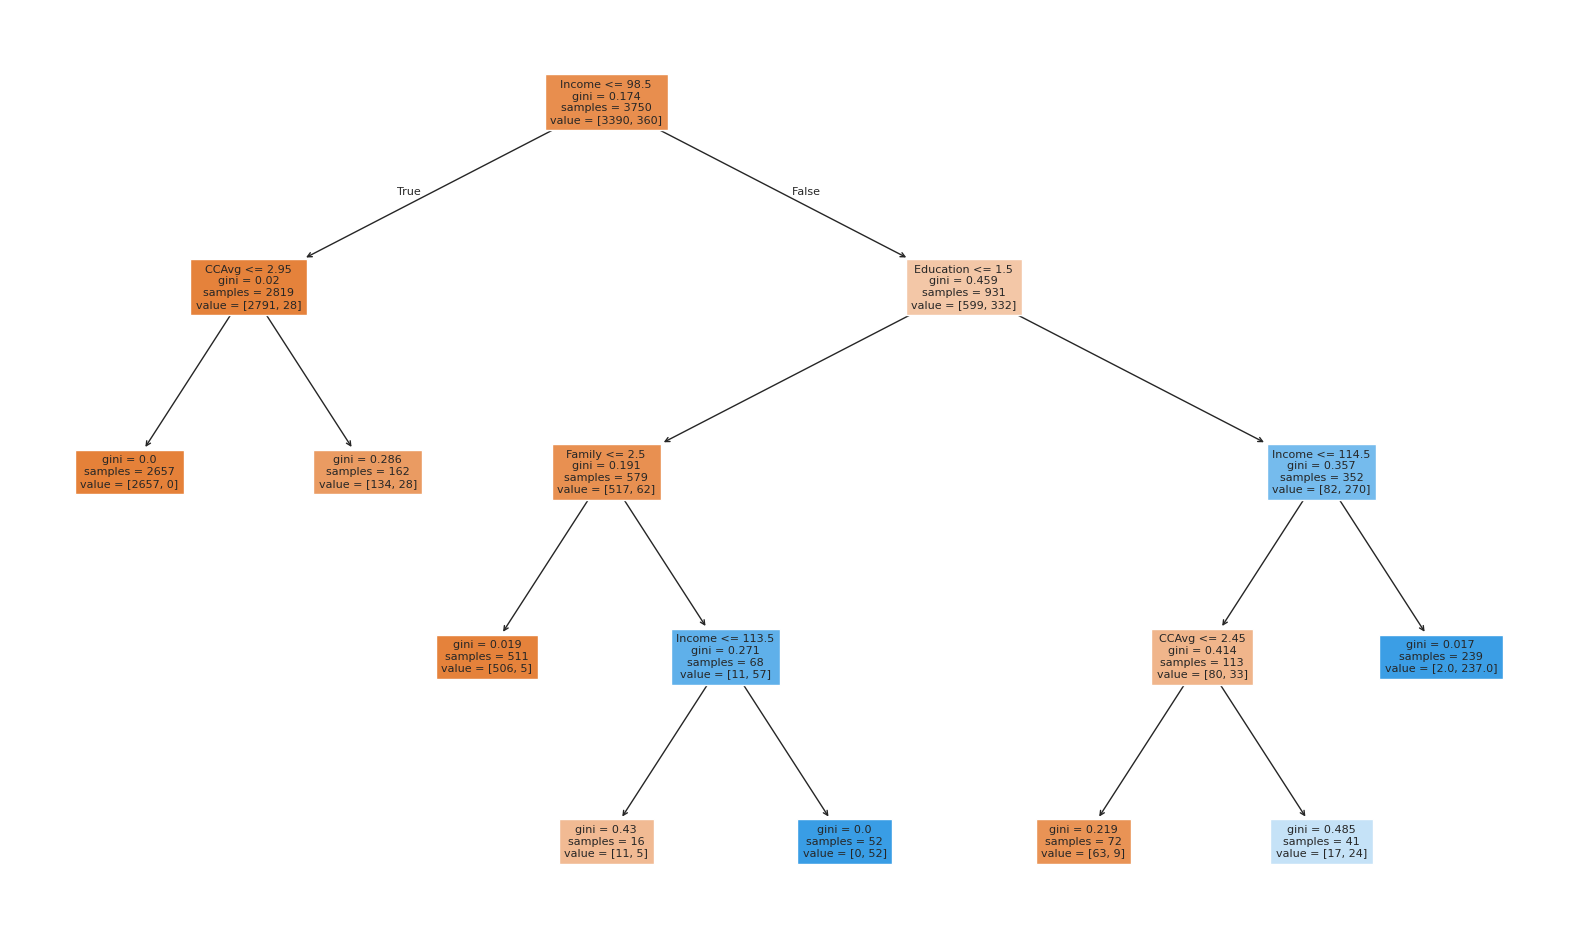

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.45
|   |   |   |   |--- class: 0
|   |   |   |--- CCAvg >  2.45
|   |   |   |   |--- class: 1
|   |   |--- Income >  114.50
|   |   |   |--- class: 1



In [ ]:
final = dt_post
fi = pd.Series(final.feature_importances_, index=X.columns).sort_values(ascending=False)
display(fi.head(20))

plt.figure(figsize=(8,6))
fi.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 features (final)")
plt.show()

plt.figure(figsize=(20,12))
plot_tree(final, feature_names=X.columns, max_depth=4, filled=True, fontsize=8)
plt.show()

print(export_text(final, feature_names=list(X.columns), max_depth=4))

Selected final decision tree (post-pruned/pre-pruned) that gives best operational tradeoff; top features listed and decision rules exported for business use.

Use model to rank customers

In [ ]:
final_full = DecisionTreeClassifier(**final.get_params())
final_full.fit(X, y)

X_full = X.copy()
X_full.index = df_personal_loan.index

df_personal_loan['pred_prob'] = final_full.predict_proba(X_full)[:,1]
df_personal_loan['pred_label'] = final_full.predict(X_full)

if 'Cluster' not in df_personal_loan.columns:
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=4 if 'cluster_labels' not in globals() else len(np.unique(cluster_labels)),
                    random_state=42)
    df_personal_loan['Cluster'] = kmeans.fit_predict(scaled_df)

top_targets = df_personal_loan.sort_values('pred_prob', ascending=False).head(200)

Generated predicted probabilities for all customers and produced a ranked list (top targets) for the campaign.

Handle class imbalance

In [ ]:
dt_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_balanced.fit(X_train, y_train)
print("Recall balanced:", recall_score(y_test, dt_balanced.predict(X_test)))

Recall balanced: 0.9416666666666667


Tried class weighting to improve recall for minority class (loan takers)

## Observation from the Decision Tree Model:
1. Income is the strongest and earliest split, dominating prediction.

    Below ~98K -> very low loan acceptance

    Above ~98K -> significantly higher acceptance

2. CCAvg (credit card spend) differentiates high-value borrowers.

    High spenders -> higher loan appetite or liquidity needs.

3. CD Account is a powerful predictor.

    Customers with CD Accounts show very high conversion.

    Indicates trust, bank relationship depth.

4. Education impacts adoption.

    Higher education levels -> greater financial awareness -> higher acceptance.

5. Family size matters.

    Larger families -> higher expenditure -> more likely to take personal loans.

6. Model performance improved significantly with pruning.

    Baseline tree was overfit.

    Pre-pruning reduced noise.

    **Post-pruning provided the cleanest, most interpretable rules**.


* The final rules are stable and business-friendly:

e.g., “If Income > 114K AND CCAvg > 2.45 -> loan probability extremely high.”


## Model Building K-Means

In [ ]:
kmeans_df = scaled_df.copy()

Finding Optimal Number of Clusters using Elbow Method

Number of Clusters: 2 	WCSS: 50100.491654690144
Number of Clusters: 3 	WCSS: 45668.34575251168
Number of Clusters: 4 	WCSS: 40907.047416251626
Number of Clusters: 5 	WCSS: 38655.82580097492
Number of Clusters: 6 	WCSS: 36854.968115344454
Number of Clusters: 7 	WCSS: 35481.58945276418
Number of Clusters: 8 	WCSS: 34417.77268956427
Number of Clusters: 9 	WCSS: 33161.2141816067
Number of Clusters: 10 	WCSS: 32336.174849281717


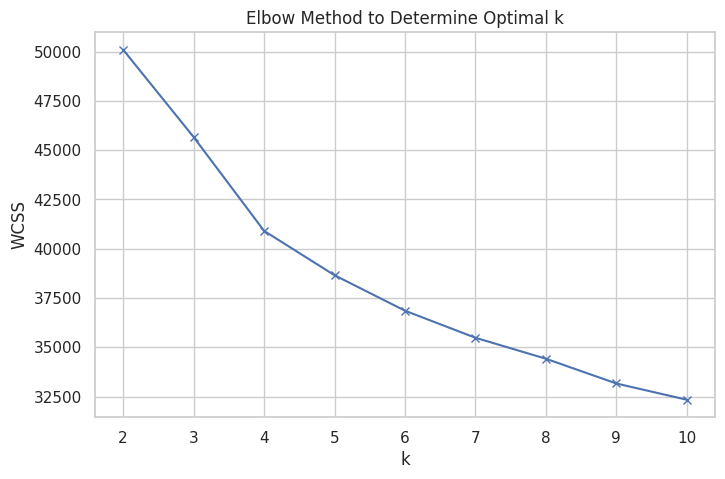

In [ ]:
clusters = range(2, 11)
wcss = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(kmeans_df)
    wcss.append(model.inertia_)
    print(f"Number of Clusters: {k} \tWCSS: {model.inertia_}")

plt.figure(figsize=(8,5))
plt.plot(clusters, wcss, "bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

Observations from Elbow Curve:

* The elbow appears around k = 4.
* We will validate this using silhouette scores.

Silhouette Score Analysis

For n_clusters = 2, the silhouette score is 0.2110707707964697
For n_clusters = 3, the silhouette score is 0.20058554398389403
For n_clusters = 4, the silhouette score is 0.2022806924507278
For n_clusters = 5, the silhouette score is 0.1318950300251733
For n_clusters = 6, the silhouette score is 0.13974144785108647
For n_clusters = 7, the silhouette score is 0.14002607979570988
For n_clusters = 8, the silhouette score is 0.12008318164406878
For n_clusters = 9, the silhouette score is 0.12817972078029657


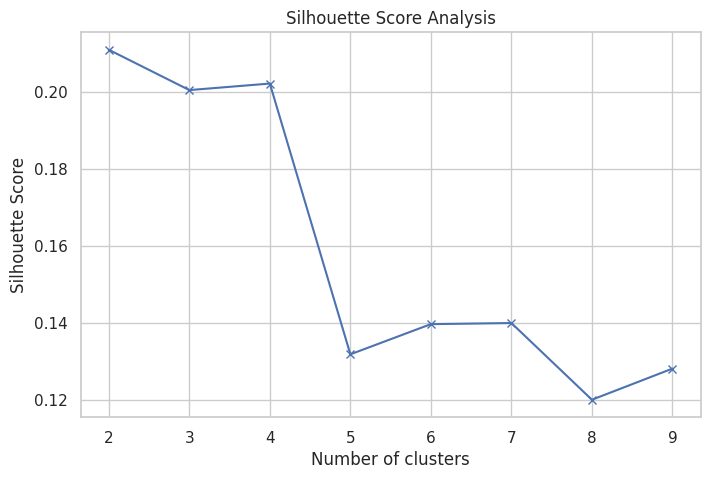

In [ ]:
sil_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(kmeans_df)
    score = silhouette_score(kmeans_df, preds)
    sil_scores.append(score)
    print(f"For n_clusters = {k}, the silhouette score is {score}")

plt.figure(figsize=(8,5))
plt.plot(cluster_range, sil_scores, "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

Observations:
* Silhoutte generally tells the highest score is the better cluster seperation
* here it shows 2 has the highest separation but silhoutte alone can be mislead as k = 2 is the start of the curve its not an elbow - it is best but generic, it will split into two big or very small which might not have much accurate information.
* K=3 and k=4 are very close 0.200 and 0.202
* The drop of k=4 is very huge, the clusters will get messy.


Hence Optimal Number of clusters is 4.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(kmeans_df)

df_personal_loan['Cluster'] = cluster_labels



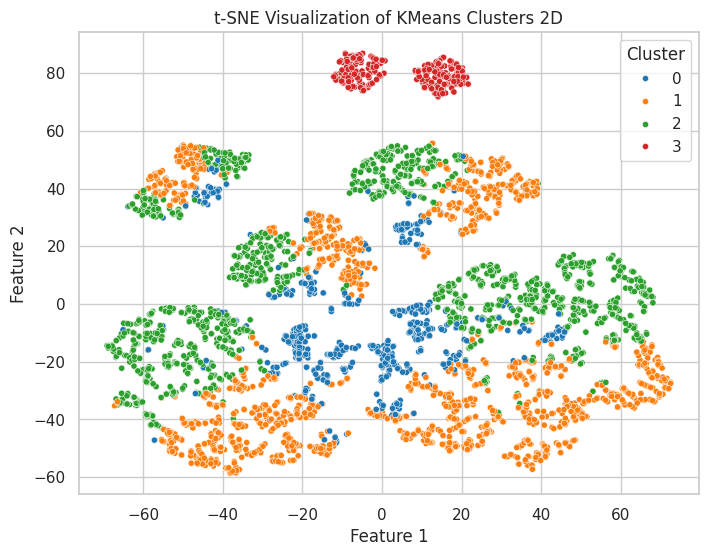

In [ ]:
df_personal_loan["Cluster"] = cluster_labels
tsne_2d_df["Cluster"] = cluster_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_2d_df,
    x="Feature 1",
    y="Feature 2",
    hue="Cluster",
    palette="tab10",
    s=20
)
plt.title("t-SNE Visualization of KMeans Clusters 2D")
plt.show()

## Cluster Profiling

In [ ]:
cluster_profile = df_personal_loan.groupby("Cluster").mean(numeric_only=True)
cluster_profile["Count"] = df_personal_loan["Cluster"].value_counts()
cluster_profile

Age  Experience      Income       ZIPCode    Family     CCAvg  \
Cluster                                                                        
0        41.443038   16.492264  138.895218  93097.268636  1.765120  4.025049   
1        55.741021   30.421550   60.691635  93120.654537  2.398393  1.440780   
2        34.995190    9.733832   58.486371  93227.308391  2.623731  1.307007   
3        45.701987   20.572848  104.241722  93319.629139  2.460265  2.651589   

         Education   Mortgage  Personal_Loan  Securities_Account  CD_Account  \
Cluster                                                                        
0         1.426160  69.837553       0.263010            0.064698         0.0   
1         1.955104  45.395085       0.044896            0.076560         0.0   
2         1.962587  45.248263       0.030999            0.089257         0.0   
3         1.927152  73.190397       0.463576            0.486755         1.0   

           Online  CreditCard  max_possible_exp  Experience_clean  \
Cluster                                                             
0        0.556962    0.218003         23.443038         16.527426   
1        0.590737    0.273629         37.741021         30.421550   
2        0.563870    0.265099         16.995190          9.843934   
3        0.937086    0.794702         27.701987         20.572848   

         Experience_imputed  pred_prob  pred_label  Count  
Cluster                                                    
0                  0.007032   0.271211    0.264416    711  
1                  0.000000   0.046457    0.038752   2116  
2                  0.025120   0.027236    0.020310   1871  
3                  0.000000   0.456650    0.473510    302

### **Obervations**:

1. **Cluster 0 — High-Income, High-Spending Young Professionals**

    **Profile Summary:**

    Income: Very high (≈ 139K — highest of all clusters)

    Age: ~41

    Credit Card Usage (CCAvg): Most active spenders

    Family size: ~1.8

    Online usage: High

    Loan conversion rate: 26% (good)

    CD/Securities usage: Very low

    Education: Mostly graduates

    **Indights**:
    * This segment is wealthy, digitally active, and comfortable with credit.
    * Their higher income and spending indicate strong borrowing potential.
    * They do not engage with investment products (CDs/Securities), which is a missed opportunity.

2. **Cluster 1 — “Older, Moderate-Income, Low Loan Adoption Customers”**

    **Profile Summary:**

    Income: Low-moderate (≈ 60K)

    Age: Oldest group (~56 years)

    Experience: Highest

    Loan adoption: Very low (4.5%)

    Spending: Low

    Education: Mostly basic

    Digital usage: Moderate

    CD/Securities: Low but slightly higher than other non-investor groups

    **Insights:**

    * These customers are in the late stage of their career and financially conservative.

    * Their low spending and low loan adoption show risk-averse behavior.

    * However, their stable income and long experience indicate low credit risk for the bank.

3. **Cluster 2 — “Young, Low-Income Families with Very Low Loan Adoption”**

    **Profile Summary:**

    Age: Youngest cluster (~35)

    Income: Low (≈ 58K)

    Family size: Largest families (~2.6)

    Spending: Very low

    Loan adoption: Lowest (3%)

    Digital: Medium

    Education: Mostly graduates

    CD/Investment: Low

    **Insights:**

    * These customers have young families, lower incomes, and are budget constrained.

    * Their minimal loan adoption indicates either:
      ▪ Lack of eligibility due to low disposable income
      ▪ Fear of debt
      ▪ Inadequate product targeting

4. **Cluster 3 — “High-Value Prime Customers with Very High Investment & Loan Uptake”**

    **Profile Summary:**

    Income: High (~104K)

    Loan adoption: 46% — highest among all clusters

    CD Account: 100% (!) all have CDs

    Securities Account: 49%

    Credit Card & Online usage: Extremely high

    Education: High

    Age: Mid-career (~46)

    Spending: High but controlled

   ** Insights:**

    * This is your most bank-engaged, financially sophisticated segment.

    * They actively use loans, CDs, securities, online banking, and credit cards.

    * They represent the highest lifetime value (LTV) group.


## **Recommendations for AllLife Bank Marketing Team**

**1. Cluster 0 — “High-Income, High-Spending Young Professionals:**

    a) Premium Personal Loan Offers

        * Higher loan limits

        * Instant approval

        * Reduced interest rates or bundled fee waivers

    b) Cross-Sell Investment Products**

        * CD Account promotions (safe, guaranteed returns)

        * Personalized financial planning advisory

        * Investment starter kits (low-risk funds)

    c) Digital Banking Upsell

        * Promote app-based loan top-ups and pre-approved offers

        * Cashback rewards on credit card usage

    d) Lifestyle-based Marketing

        * Target via online channels

        * Pitch “convenience + speed” messaging


**2. Cluster 1 — “Older, Moderate-Income, Low Loan Adoption Customers”:**

    a) Safe, Low-Risk Products

        * Fixed deposits / CDs

        * Retirement savings plans

        * Wealth-preservation advisory

    b) Personal Loan Promotion for Home / Medical Needs

        * Target needs-based use-cases

        * Lower-cost installment loans

        * Highlight stability and low EMI burden

    c) Insurance Cross-Sell

        * Health, life, senior-care packages

    d) Offline Relationship Management

        * RM-based targeting

        * Branch awareness programs

**3. Cluster 2 — “Young, Low-Income Families with Very Low Loan Adoption”:**

    a) Small Ticket Personal Loans

        * Low EMI micro-loans

        * Educational loans for children

        * Emergency or salary-advance loans

    b) Financial Literacy Campaigns

        * Show benefits of structured loans

        * Budgeting tools & EMI calculators

    c) Digital-first Marketing

        * In-app nudges for pre-approved micro-loans

        * Cashback-based credit card programs to increase spend capacity

    d) Cross-sell Affordable Products

        * Beginner savings plans

        * Kids education investment accounts

**4. Cluster 3 — “High-Value Prime Customers with Very High Investment & Loan Uptake”:**

    a) Exclusive Offers (VIP Banking)

        * Priority customer service

        * Lower interest rates for high-value loans

        * Premium credit cards

    b) Cross-Sell Advanced Investments

        * Mutual funds, market-linked products

        * Portfolio advisory

        * Wealth management programs

    c) Upsell Larger Loans

        * Business loans

        * Home renovation loans

        * High-limit personal loans

    d) Loyalty & Retention Strategy

        * Rewards programs

        * Relationship manager assignments

        * Exclusive events (investment webinars, premium lounges)




Takeaways from the analysis done above:

**From both the models we can confirm that:**

1. High-income customers are the core drivers of loan adoption.

2. High credit card spending (CCAvg) is a direct indicator of loan acceptance.

3. CD account ownership is the clearest engagement indicator.

4. Higher education correlates with higher loan uptake.

5. Large families show moderate-to-high probability and are a growing opportunity segment.

6. Low-income groups with low spending have extremely low adoption.


K means clustering shows us that there are 4 consumer patterns/groups - helps recognize the patterns.

Decision Tree helps predict who will take a loan - helps ranking the cusomters by probability.


**Key Questions discussed above - Answering based on the analysis done above.**

1) Which customer features are most predictive of personal loan uptake?

***Income, CCAvg, CD Account, Education, and Family size are the strongest predictors.***

2) Can we create a robust predictive model to rank customers by purchase probability?

***Yes — the post-pruned Decision Tree provides strong generalization and can be used as a reliable customer scoring model.***

3) Which customer segments should marketing target to maximize conversions and ROI?

***High-income, high-spending, educated customers who hold CD accounts or multiple bank products.***

4) Which customer attributes differ most between loan takers and non-takers?

***Income, credit card spending (CCAvg), CD account ownership, and education show the sharpest differences.***

5) Any demographic patterns among customers who have taken personal loans?

***Yes — mid-career customers (age 40-50), well-educated, higher-income, engaged with multiple bank products***

6) How do financial factors impact loan adoption?

***Higher income, spending, and existing investment products dramatically increase loan acceptance probability.***

7) Overall key personal loan acceptance rate across all segments?

***The dataset shows ~9.6% overall loan acceptance, with huge variation across segments (from 3% to 46%).***



## **Actionable Insights & Recommendations (Final Section)**
1. Key Takeaways for the Marketing Team

Based on both the Decision Tree model and K-Means segmentation, several patterns clearly emerge:

1) High-income, high-spending, and financially active customers drive the majority of personal loan conversions.

These customers (Income > 100K, CCAvg > 2.5, educated, active CD users) show the highest probability of taking a loan and should be the primary target segment.

2) CD Account ownership is the strongest behavioural indicator of loan acceptance.

Customers who already trust the bank with investments (CD/Securities) have a dramatically higher likelihood of converting.

3) Younger, low-income customers convert the least.

This group (Cluster 2) has the lowest adoption (≈3%), driven by low disposable income and risk aversion. They should not be prioritized in high-cost campaigns.

4) Mid-career, educated customers are an emerging opportunity segment.

This group demonstrates moderate but growing adoption—particularly families with rising expenses.

5) Pruned Decision Tree rules provide clear operational guidelines.

----------------

The final model gives business-friendly rules such as:
“If Income > 114K AND CCAvg > 2.45 -> loan probability extremely high.”

These rules can be directly integrated into a lead-scoring engine.

**## Recommended Campaign Strategy for AllLife**

1. **Primary Target Segment — “High-Value Prime Customers” (Cluster 3 + High-probability tree rules)**

  **Goal:** Maximize conversions and ROI quickly.

  **Why them:** Highest loan acceptance (46%), high digital activity, strong engagement.

  **Recommended Actions:**

    Pre-approved high-value personal loans

    Priority interest rates & instant approvals

    Cross-sell wealth products (MFs, CDs, advisory)

    Dedicated RM + premium loyalty benefits

    Push via email, app notifications, and online ads


2. **Secondary Target Segment — “High-Income Young Professionals” (Cluster 0)**

  **Goal:** Grow future high-LTV customers.

  **Why them:** High income + high spending = strong loan potential.

  **Recommended Actions:**

    Digital-first loan offers (“1-click loan”)

    Lifestyle-based campaigns (travel, gadgets, home upgrades)

    Promote CD accounts to deepen engagement

    Credit card spend–based personalized offers


3. **Third Priority — “Older, Conservative Customers” (Cluster 1)**

  **Goal:** Steady but low-risk conversions.

  **Why them:** Low spending but stable income & long banking history.

  **Recommended Actions:**

    Needs-based messaging (medical, home repairs, emergency use)

    EMI-focused communication (“Low EMI, no stress”)

    Promote CDs/FDs as safety instruments

    Use branch RMs instead of digital targeting

4. **Low Priority — “Young, Low-Income Families” (Cluster 2)**

  **Goal:** Avoid unnecessary marketing cost.

  **Why them**: Lowest conversion (3%) and low eligibility.

  **Recommended Actions:**

    Offer only micro-loans, salary-advance loans

    Financial literacy messaging (budgeting, EMI planning)

    Do not spend premium marketing budget here

OVERALL RECOMMENDATION

1. Build a Lead-Scoring System using the Pruned Decision Tree:

  Use top predictors (Income, CCAvg, CD Account, Education) to generate a conversion probability score for each customer.
  
2. Map Scores to Cluster Personas:

    High scorers in Cluster 3 -> Premium offers

    High scorers in Cluster 0 -> Digital lifestyle loans

    Medium scorers in Clusters 1 -> Safety + EMI-friendly loans

    Low scorers in Cluster 2 -> Microloans + education only

3. Allocate Marketing Budget Strategically:

    60% -> Cluster 3

    30% -> Cluster 0

    10% -> Cluster 1

    <2% -> Cluster 2

4. Use Multichannel Targeting:
    App pushes + email -> high-value segments

    RMs + branch marketing -> older conservative customers

    Educational content + nudges -> young families

5. Track Results Using Conversion Analytics

  Monitor:

    Response rate

    Click-through rate (for digital offers)

    Loan approval + disbursement rate

    Lifetime value of converted customers


AllLife Bank should focus its marketing campaign primarily on high-income, high-spending, financially active customers—where conversion potential is highest—and use a segmented, data-driven strategy to tailor offers and maximize ROI.